# PCA_OPTICS

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime as dt
import re

import pandas_datareader.data as web
from pandas_datareader import data as pdr

import yfinance as yf

yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

# Setting baseline seed
np.random.seed(231017)

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("ggplot") # Grammar of Graphics Theme

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [2]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

In [3]:
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

### Import Data & Data Cleaning

In [4]:
currency_pairs = [
    'SGD=X', 'SGDMYR=X', 'GBPSGD=X', 'EURSGD=X', 'SGDJPY=X', 'SGDHKD=X', 'SGDIDR=X',
    'SGDCNY=X', 'SGDPHP=X', 'SGDTHB=X', 'SGDINR=X', 'SGDVND=X', 'SGDKRW=X', 'AUDSGD=X',
    'NZDSGD=X', 'GBPUSD=X', 'JPY=X', 'HKD=X', 'MYR=X', 'INR=X', 'CNY=X', 'PHP=X',
    'IDR=X', 'THB=X', 'CHF=X', 'MXN=X', 'AUDUSD=X', 'NZDUSD=X', 'KRW=X', 'VND=X',
    'CAD=X', 'EURJPY=X', 'GBPJPY=X', 'EURGBP=X', 'EURSEK=X', 'EURCHF=X', 'EURHUF=X',
    'EURJPY=X'
]


SGD=X: USD/SGD (US Dollar / Singapore Dollar) \
SGDMYR=X: SGD/MYR (Singapore Dollar / Malaysian Ringgit) \
GBPSGD=X: GBP/SGD (British Pound / Singapore Dollar) \
EURSGD=X: EUR/SGD (Euro / Singapore Dollar) \
SGDJPY=X: SGD/JPY (Singapore Dollar / Japanese Yen) \
SGDHKD=X: SGD/HKD (Singapore Dollar / Hong Kong Dollar) \
SGDIDR=X: SGD/IDR (Singapore Dollar / Indonesian Rupiah) \
SGDCNY=X: SGD/CNY (Singapore Dollar / Chinese Yuan) \
SGDPHP=X: SGD/PHP (Singapore Dollar / Philippine Peso) \
SGDTHB=X: SGD/THB (Singapore Dollar / Thai Baht) \
SGDINR=X: SGD/INR (Singapore Dollar / Indian Rupee) \
SGDVND=X: SGD/VND (Singapore Dollar / Vietnamese Dong) \
SGDKRW=X: SGD/KRW (Singapore Dollar / South Korean Won) \
AUDSGD=X: AUD/SGD (Australian Dollar / Singapore Dollar) \
NZDSGD=X: NZD/SGD (New Zealand Dollar / Singapore Dollar) \
GBPUSD=X: GBP/USD (British Pound / US Dollar) \
JPY=X: USD/JPY (US Dollar / Japanese Yen) \
HKD=X: USD/HKD (US Dollar / Hong Kong Dollar) \
MYR=X: USD/MYR (US Dollar / Malaysian Ringgit) \
INR=X: USD/INR (US Dollar / Indian Rupee) \
CNY=X: USD/CNY (US Dollar / Chinese Yuan) \
PHP=X: USD/PHP (US Dollar / Philippine Peso) \
IDR=X: USD/IDR (US Dollar / Indonesian Rupiah) \
THB=X: USD/THB (US Dollar / Thai Baht) \
CHF=X: USD/CHF (US Dollar / Swiss Franc) \
MXN=X: USD/MXN (US Dollar / Mexican Peso) \
AUDUSD=X: AUD/USD (Australian Dollar / US Dollar) \
NZDUSD=X: NZD/USD (New Zealand Dollar / US Dollar) \
KRW=X: USD/KRW (US Dollar / South Korean Won) \
VND=X: USD/VND (US Dollar / Vietnamese Dong) \
CAD=X: USD/CAD (US Dollar / Canadian Dollar) \
EURJPY=X: EUR/JPY (Euro / Japanese Yen) \
GBPJPY=X: GBP/JPY (British Pound / Japanese Yen) \
EURGBP=X: EUR/GBP (Euro / British Pound) \
EURSEK=X: EUR/SEK (Euro / Swedish Krona) \
EURCHF=X: EUR/CHF (Euro / Swiss Franc) \
EURHUF=X: EUR/HUF (Euro / Hungarian Forint)

In [5]:
# Initialize an empty dictionary to store the data
forex_data = {}

# Download data for each currency pair and store the "Adj Close" values
for pair in currency_pairs:
    data = yf.download(pair, start='2013-12-31', end='2024-05-25')
    forex_data[pair] = data['Adj Close']

# Convert the dictionary to a DataFrame
forex_df = pd.DataFrame(forex_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SGDPHP=X']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2013-12-31 -> 2024-05-25)')
[*********************100%%**********************]  1 of 1 completed


$SGDPHP=X: possibly delisted; No price data found  (1d 2013-12-31 -> 2024-05-25)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SGDVND=X']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2013-12-31 -> 2024-05-25)')
[*********************100%%**********************]  1 of 1 completed


$SGDVND=X: possibly delisted; No price data found  (1d 2013-12-31 -> 2024-05-25)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
forex_df.head()

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDPHP=X,SGDTHB=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31 00:00:00,1.26698,2.5456,2.0894,1.74970,82.772003,6.1179,9619.500000,4.7758,NaN,25.896999,...,0.821760,1054.300049,21055.0,1.06450,144.899994,173.028000,0.83720,8.85440,1.22520,296.119995
2014-01-01 00:00:00,1.26231,2.5535,2.0894,1.73540,82.772003,6.1446,9647.799805,4.7880,NaN,25.875999,...,0.822707,1054.800049,20835.0,1.06193,144.750000,174.300003,0.82973,8.84327,1.22720,296.911987
2014-01-02 00:00:00,1.26401,2.5480,2.0950,1.73980,83.301003,6.1324,9493.000000,4.7769,NaN,25.879999,...,0.820883,1050.750000,21055.0,1.06445,145.011002,174.593002,0.83040,8.85220,1.22725,296.700012
2014-01-03 00:00:00,1.26695,2.5518,2.0834,1.73110,82.723000,6.1187,9672.599609,4.7692,NaN,25.997000,...,0.818733,1049.599976,21050.0,1.06691,143.257004,172.403000,0.83079,8.91160,1.22873,297.589996
2014-01-06 00:00:00,1.26645,2.5564,2.0780,1.72174,82.769997,6.1208,9485.299805,4.7690,NaN,26.028999,...,0.826720,1053.800049,21050.0,1.06305,142.626007,172.138000,0.82850,8.86360,1.23050,298.649994


In [7]:
forex_df.describe()

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDPHP=X,SGDTHB=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
count,2711.000000,2706.000000,2712.000000,2712.000000,2711.000000,2711.000000,2676.000000,2711.000000,0.0,2711.000000,...,2711.000000,2711.000000,2713.000000,2711.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000
mean,1.355504,3.037714,1.831844,1.544555,86.246462,5.752673,10243.293559,4.909988,NaN,24.554234,...,0.686842,1171.956326,22707.886134,1.289887,132.795416,157.589578,0.846479,10.159160,1.083139,338.235582
std,0.040507,0.244677,0.150225,0.074509,9.949081,0.173600,989.753241,0.202730,NaN,1.270506,...,0.064005,89.226602,1258.342546,0.074900,11.841694,18.145485,0.051407,0.744096,0.072521,32.134684
min,1.237160,0.737200,1.542990,1.380500,73.753998,5.323541,9.580800,4.425900,NaN,21.271000,...,0.557240,999.830017,21.000000,1.061930,111.202003,125.961998,0.694100,8.754700,0.927700,296.118988
25%,1.339670,2.979950,1.730803,1.494792,80.110699,5.663500,9598.875244,4.779950,NaN,23.671000,...,0.641764,1114.114990,22084.000000,1.261235,124.256752,142.605251,0.833758,9.490075,1.043152,310.870499
50%,1.356660,3.050700,1.788035,1.538560,82.084999,5.749300,10403.600098,4.899397,NaN,24.665001,...,0.680092,1153.939941,22861.000000,1.308260,130.605003,153.019501,0.859000,10.215995,1.083720,323.447495
75%,1.378305,3.120914,1.875612,1.596500,89.535500,5.820600,10711.321777,5.028833,NaN,25.601500,...,0.718355,1210.000000,23253.000000,1.337845,138.730247,172.159996,0.881092,10.611050,1.129843,362.719505
max,1.456300,3.569286,2.222360,1.761400,116.162903,6.263000,11953.043945,5.447876,NaN,27.245575,...,0.882379,1443.959961,25469.000000,1.457800,169.822006,199.339005,0.979000,11.943280,1.238240,431.815002


In [8]:
forex_df.isna().sum().sort_values(ascending = False)

#drop 'SGDPHP=X' and 'SGDVND=X', other use ffill

SGDPHP=X    2714
SGDVND=X    2714
SGDIDR=X      38
SGDMYR=X       8
CNY=X          4
SGD=X          3
JPY=X          3
KRW=X          3
NZDUSD=X       3
AUDUSD=X       3
CHF=X          3
THB=X          3
IDR=X          3
PHP=X          3
INR=X          3
HKD=X          3
GBPUSD=X       3
CAD=X          3
NZDSGD=X       3
SGDKRW=X       3
SGDINR=X       3
SGDTHB=X       3
SGDCNY=X       3
SGDHKD=X       3
SGDJPY=X       3
EURGBP=X       2
GBPJPY=X       2
EURSEK=X       2
EURCHF=X       2
EURJPY=X       2
MYR=X          2
AUDSGD=X       2
EURSGD=X       2
GBPSGD=X       2
EURHUF=X       2
VND=X          1
MXN=X          1
dtype: int64

In [9]:
drop = ['SGDPHP=X', 'SGDVND=X']

forex_df = forex_df.drop(labels = drop, axis = 1)

In [10]:
forex_df.shape

(2714, 35)

In [11]:
forex_df = forex_df.fillna(method="ffill")

In [12]:
forex_df.sort_index(inplace=True)

# Function to detect outliers using MAD and replace them with the previous row's price
def replace_outliers_with_previous_price_mad(df, threshold=5):
    for column in df.columns:
        # Calculate daily percentage change
        pct_change = df[column].pct_change().dropna()

        # Calculate the Median Absolute Deviation
        median_pct_change = pct_change.median()
        mad = np.median(np.abs(pct_change - median_pct_change))
        # Identify outliers based on the threshold
        outliers = np.abs(df[column].pct_change() - median_pct_change) > threshold * mad
        
        # Replace outlier prices with the previous row's price
        df.loc[outliers, column] = np.nan
        df[column] = df[column].fillna(method='ffill')
    
    return df

forex_df = replace_outliers_with_previous_price_mad(forex_df)

In [13]:
forex_df.isna().sum().sort_values(ascending = False)

SGD=X       0
KRW=X       0
IDR=X       0
THB=X       0
CHF=X       0
MXN=X       0
AUDUSD=X    0
NZDUSD=X    0
VND=X       0
CNY=X       0
CAD=X       0
EURJPY=X    0
GBPJPY=X    0
EURGBP=X    0
EURSEK=X    0
EURCHF=X    0
PHP=X       0
INR=X       0
SGDMYR=X    0
SGDTHB=X    0
GBPSGD=X    0
EURSGD=X    0
SGDJPY=X    0
SGDHKD=X    0
SGDIDR=X    0
SGDCNY=X    0
SGDINR=X    0
MYR=X       0
SGDKRW=X    0
AUDSGD=X    0
NZDSGD=X    0
GBPUSD=X    0
JPY=X       0
HKD=X       0
EURHUF=X    0
dtype: int64

### Exploratory Data Analysis (EDA)

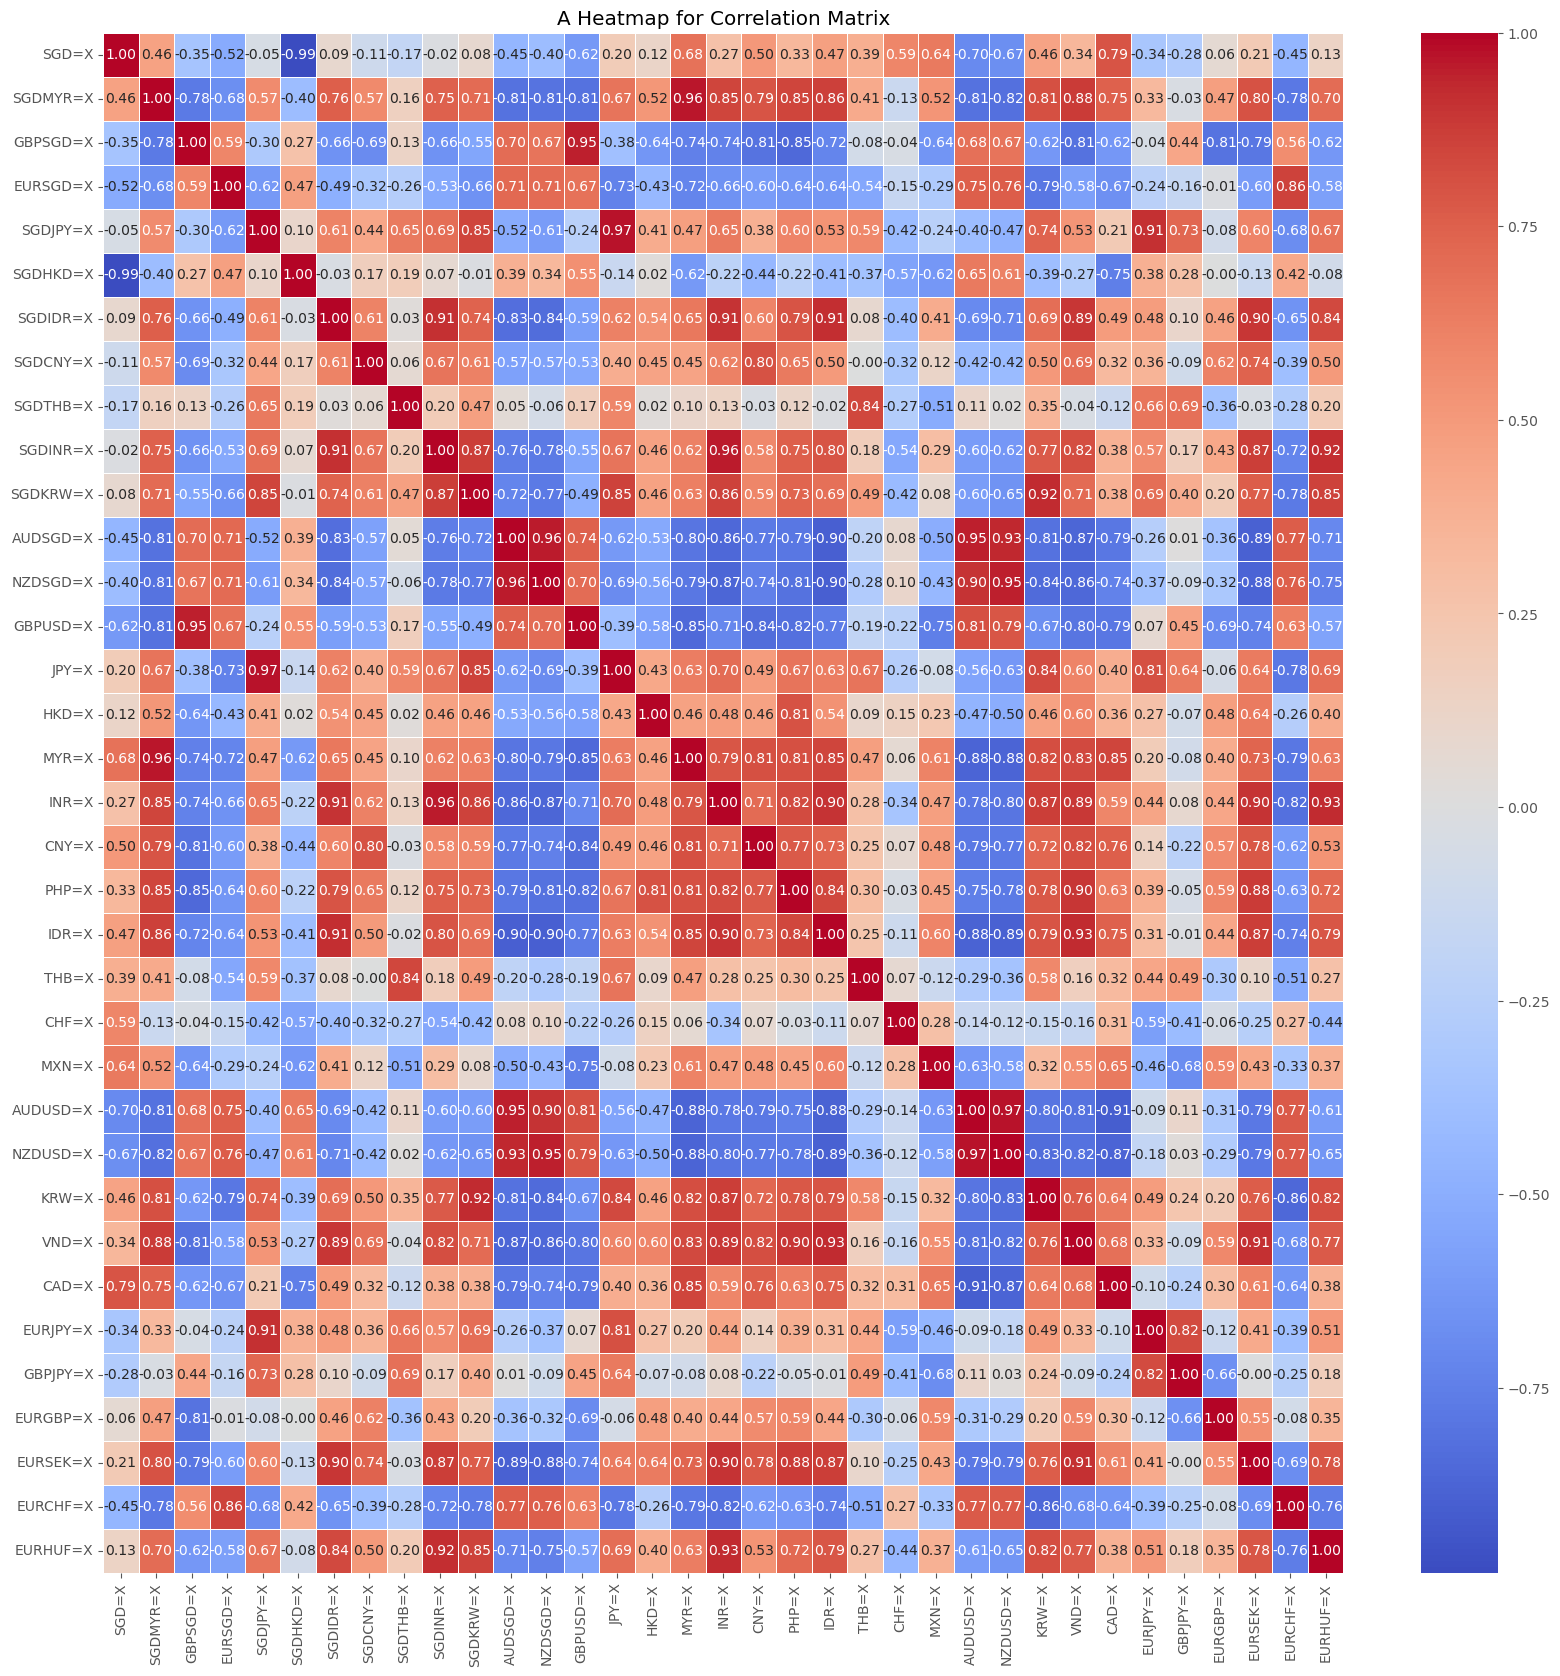

In [14]:
corr = forex_df.corr()

plt.figure(figsize = [20, 20])

plt.title("A Heatmap for Correlation Matrix")

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.show()

### Calculate Return

In [15]:
return_df = forex_df.pct_change()

return_df.shape

(2714, 35)

In [16]:
return_df = return_df.dropna()

### Data Transformation

In [17]:
scaler = StandardScaler().fit(return_df)

In [18]:
scaled_df = pd.DataFrame(scaler.fit_transform(return_df),
                         columns = return_df.columns,
                         index = return_df.index)

scaled_df.describe()

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDTHB=X,SGDINR=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
count,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,...,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03
mean,1.702369e-17,-1.964272e-17,1.440466e-17,1.178563e-17,5.238059e-18,-2.946408e-17,3.928544e-18,4.583302e-18,-5.238059e-18,7.857089e-18,...,-2.422602e-17,-1.047612e-17,-1.145825e-18,1.047612e-17,2.095224e-17,-1.309515e-17,1.145825e-17,-7.202331e-18,1.047612e-17,-1.702369e-17
std,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,...,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00
min,-6.405058e+00,-6.478988e+00,-1.639983e+01,-7.233354e+00,-8.537977e+00,-4.711818e+00,-6.632300e+00,-5.165626e+00,-6.068683e+00,-4.879045e+00,...,-6.730686e+00,-5.070745e+00,-1.394658e+01,-5.949638e+00,-1.028467e+01,-1.501230e+01,-5.703619e+00,-6.279418e+00,-3.765393e+01,-7.801590e+00
25%,-5.803594e-01,-4.801371e-01,-4.799218e-01,-5.257409e-01,-5.056664e-01,-5.560345e-01,-4.361442e-01,-5.393868e-01,-4.856675e-01,-5.624243e-01,...,-5.928626e-01,-5.899819e-01,-9.033690e-02,-5.334927e-01,-5.463030e-01,-4.938419e-01,-5.145889e-01,-5.794028e-01,-3.240145e-01,-4.955305e-01
50%,-9.445906e-03,-3.237042e-02,1.083658e-02,1.625900e-02,-7.354936e-03,5.642580e-03,-1.578417e-02,-1.158839e-02,-7.027401e-03,-2.588421e-02,...,1.338596e-02,-2.037865e-02,-3.249435e-02,-6.376277e-03,-1.338832e-02,-1.106118e-02,-3.734907e-03,-2.734819e-02,1.470000e-02,-2.373799e-02
75%,5.607210e-01,4.997926e-01,4.770953e-01,5.087620e-01,5.039048e-01,5.742396e-01,4.017698e-01,5.146418e-01,4.738737e-01,5.535912e-01,...,6.169636e-01,5.932699e-01,6.288602e-02,5.308089e-01,5.462513e-01,4.955632e-01,4.628264e-01,5.898303e-01,3.514077e-01,4.859621e-01
max,4.487711e+00,9.106607e+00,5.918963e+00,1.097781e+01,6.564438e+00,6.108419e+00,6.324339e+00,4.583896e+00,6.210613e+00,6.014786e+00,...,6.435220e+00,6.036515e+00,9.227529e+00,1.079539e+01,7.007503e+00,1.034093e+01,1.688448e+01,5.439798e+00,9.169923e+00,7.535140e+00


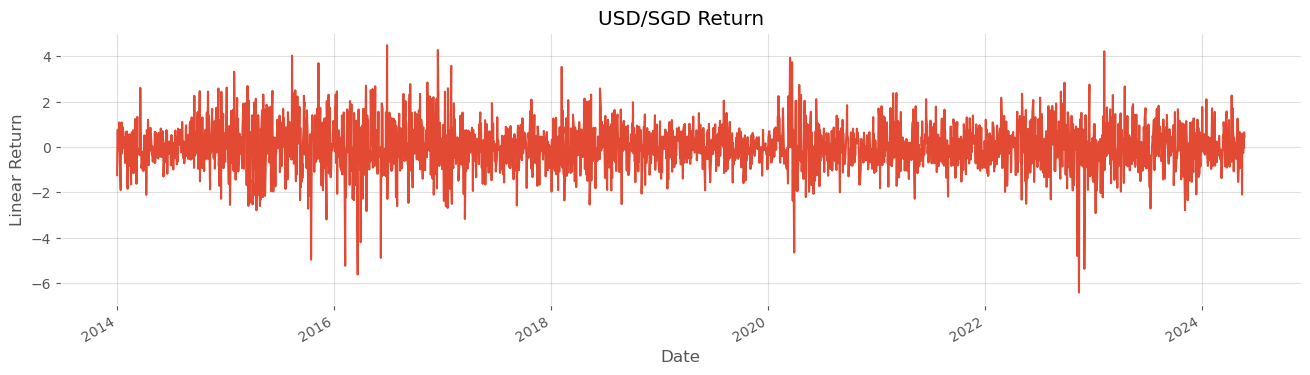

In [19]:
plt.figure(figsize = [16, 4])

plt.title("USD/SGD Return")

plt.ylabel("Linear Return")

scaled_df['SGD=X'].plot()

#plt.savefig('sample_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### Volatility Observed:

- Throughout the period, returns exhibited significant volatility.
- Most of the time, returns fluctuated within the range of -2 to 2, with occasional extreme fluctuations beyond this range.

### Characteristics of Volatility:

- From 2014 to 2024, there was no noticeable trend in volatility changes; overall, the volatility remained relatively stable.
- Specific periods, such as 2016, 2020, and 2022, saw a marked increase in volatility, likely corresponding to major market events or economic changes.

### PCA

In [20]:
prop = int(len(scaled_df) * 0.8)

X_Train = scaled_df[    : prop] # First 80% of the data

In [21]:
prop = int(len(forex_df) * 0.8)  # Split at 80% for training
forex_train = forex_df[:prop]        # First 80% of data for training
forex_test = forex_df[prop:]         # Remaining 20% of data for testing

In [22]:
correlation_matrix = X_Train.corr()

In [23]:
pca = PCA()
principal_components = pca.fit_transform(correlation_matrix)

In [24]:
from arch.unitroot.cointegration import engle_granger
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Initialize a list to store the results
results_table = []

# Assuming pca.components_ contains the principal components and forex_df contains the forex data
for i in range(pca.components_.shape[0]):
    first_component = pca.components_[i, :]
    highest = forex_train.columns[abs(first_component).argmax()]
    lowest = forex_train.columns[abs(first_component).argmin()]

    log_price = np.log(forex_train[[highest, lowest]])

     # Perform OLS regression of highest on lowest
    X = sm.add_constant(log_price[lowest])
    model = sm.OLS(log_price[highest], X).fit()
    cointegration_factor = model.params[1]  # The slope coefficient

    # Perform Engle-Granger cointegration test
    coint_result = engle_granger(log_price.iloc[:, 0], log_price.iloc[:, 1])#, trend="c", lags=0)
    pvalue_coint = coint_result.pvalue

    # Perform ADF test for stationarity
    adf_result = adfuller(model.resid, maxlag=None)
    #adf_result = adfuller(log_price.iloc[:, 0] - log_price.iloc[:, 1], maxlag=None)
    pvalue_adf = adf_result[1]

    cointegrated = "Yes" if pvalue_coint < 0.05 else "No"
    stationary = "Yes" if pvalue_adf < 0.05 else "No"

    results_table.append([f'Principal Component {i+1}', highest, lowest, cointegration_factor, cointegrated, stationary])

# Print the results as a table using tabulate
print(tabulate(results_table, headers=["Component", "Highest Asset", "Lowest Asset", "Cointegration Factor", "Cointegrated", "Stationary"]))

Component               Highest Asset    Lowest Asset      Cointegration Factor  Cointegrated    Stationary
----------------------  ---------------  --------------  ----------------------  --------------  ------------
Principal Component 1   SGD=X            VND=X                        0.453557   No              No
Principal Component 2   GBPJPY=X         IDR=X                       -0.830241   No              No
Principal Component 3   GBPSGD=X         EURSGD=X                     0.68905    No              No
Principal Component 4   NZDSGD=X         EURSGD=X                     0.681313   No              No
Principal Component 5   EURSGD=X         EURHUF=X                    -0.0319154  No              No
Principal Component 6   EURCHF=X         VND=X                       -0.530553   No              No
Principal Component 7   EURCHF=X         JPY=X                       -0.368889   No              Yes
Principal Component 8   SGDMYR=X         GBPJPY=X                    -0.413051   

In [25]:
# Filter the results table to include only pairs where both stationary and cointegrated are "Yes"
filtered_results = [result for result in results_table if result[4] == "Yes" and result[5] == "Yes"]

# Print the filtered results
print(tabulate(filtered_results, headers=["Component", "Highest Asset", "Lowest Asset", "Cointegrated Factor", "Cointegrated", "Stationary"]))

Component               Highest Asset    Lowest Asset      Cointegrated Factor  Cointegrated    Stationary
----------------------  ---------------  --------------  ---------------------  --------------  ------------
Principal Component 23  CAD=X            CHF=X                        0.959023  Yes             Yes


### PCA + OPTICS Clustering

In [26]:
from sklearn.cluster import OPTICS

# Set parameters for OPTICS
min_samples_value = 2  # Adjust as needed
max_eps_value = np.inf  # Setting to infinity allows OPTICS to determine the optimal epsilon

# Apply OPTICS
clf = OPTICS(min_samples=min_samples_value, max_eps=max_eps_value)
clf.fit(correlation_matrix)

# Extract the cluster labels
labels = clf.labels_

# Calculate the number of clusters
n_clusters_ = len(set(labels))
print(f"\nClusters discovered: {n_clusters_}")

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Stock': return_df.columns,
    'Cluster': labels
})

# Print the results as a table
print(tabulate(results_df, headers="keys", tablefmt="pretty"))

# Optional: Filter out noise points (label == -1) if needed
clustered_df = results_df[results_df['Cluster'] != -1]

print("\nClustered Stocks:")
print(tabulate(clustered_df, headers="keys", tablefmt="pretty"))

# Align the labels with the original DataFrame
clustered_series = pd.Series(index=return_df.columns, data=labels)

# Calculate the number of clusters and pairs to evaluate
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts > 1) & (counts <= CLUSTER_SIZE_LIMIT)]


Clusters discovered: 5
+----+----------+---------+
|    |  Stock   | Cluster |
+----+----------+---------+
| 0  |  SGD=X   |    0    |
| 1  | SGDMYR=X |   -1    |
| 2  | GBPSGD=X |    3    |
| 3  | EURSGD=X |   -1    |
| 4  | SGDJPY=X |    2    |
| 5  | SGDHKD=X |   -1    |
| 6  | SGDIDR=X |   -1    |
| 7  | SGDCNY=X |   -1    |
| 8  | SGDTHB=X |   -1    |
| 9  | SGDINR=X |   -1    |
| 10 | SGDKRW=X |   -1    |
| 11 | AUDSGD=X |   -1    |
| 12 | NZDSGD=X |   -1    |
| 13 | GBPUSD=X |    3    |
| 14 |  JPY=X   |   -1    |
| 15 |  HKD=X   |   -1    |
| 16 |  MYR=X   |   -1    |
| 17 |  INR=X   |   -1    |
| 18 |  CNY=X   |   -1    |
| 19 |  PHP=X   |   -1    |
| 20 |  IDR=X   |   -1    |
| 21 |  THB=X   |    0    |
| 22 |  CHF=X   |   -1    |
| 23 |  MXN=X   |   -1    |
| 24 | AUDUSD=X |    1    |
| 25 | NZDUSD=X |    1    |
| 26 |  KRW=X   |    0    |
| 27 |  VND=X   |   -1    |
| 28 |  CAD=X   |    0    |
| 29 | EURJPY=X |    2    |
| 30 | GBPJPY=X |    3    |
| 31 | EURGBP=X |   -1  

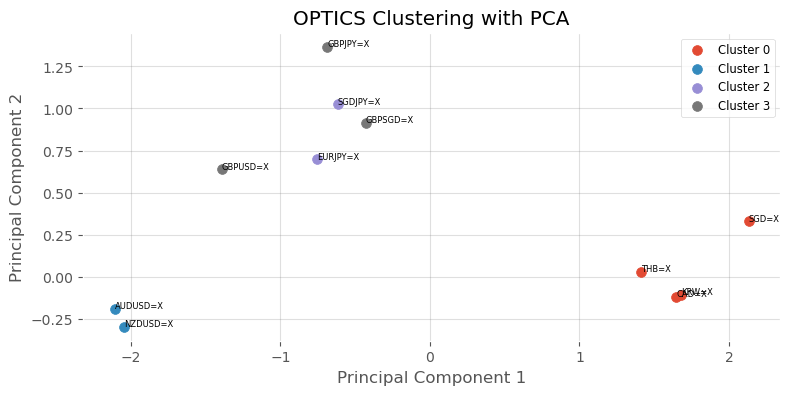

In [27]:
filtered_labels = labels[labels != -1]

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(correlation_matrix)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels
pca_df = pca_df.loc[pca_df['Cluster'] != -1]

filtered_results1 = results_df.copy()
filtered_results1['Cluster'] = labels
filtered_results1 = filtered_results1.loc[filtered_results1['Cluster'] != -1]
filtered_results1 = filtered_results1.set_index(keys='Stock')

# Plot the clusters
plt.figure(figsize=(9, 4))

# Iterate over unique clusters and plot each with a separate color and label (excluding -1)
for cluster in np.unique(filtered_labels):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', s = 50)

# Mark out filtered stock names on the plot
for i, txt in enumerate(filtered_results1.index):
    plt.annotate(txt, (pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i]), fontsize=6)

plt.title('OPTICS Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize='small')

#plt.savefig('PCA_OPTICS.png', dpi=300, bbox_inches='tight')

plt.show()

In [28]:
from itertools import combinations

clusters = clustered_df.groupby('Cluster')['Stock'].apply(list).to_dict()

# Generate pairs from each cluster
pairs = []
for cluster, stocks in clusters.items():
    if len(stocks) > 1:
        pairs.extend(list(combinations(stocks, 2)))

# Display pairs of stocks
print("\nStock Pairs for Pairs Trading:")
for pair in pairs:
    print(pair)

len(pairs)


Stock Pairs for Pairs Trading:
('SGD=X', 'THB=X')
('SGD=X', 'KRW=X')
('SGD=X', 'CAD=X')
('THB=X', 'KRW=X')
('THB=X', 'CAD=X')
('KRW=X', 'CAD=X')
('AUDUSD=X', 'NZDUSD=X')
('SGDJPY=X', 'EURJPY=X')
('GBPSGD=X', 'GBPUSD=X')
('GBPSGD=X', 'GBPJPY=X')
('GBPUSD=X', 'GBPJPY=X')


11

In [29]:
results_table1 = []

# Iterate through each pair directly
for pair in pairs:
    highest, lowest = pair  # Unpack the pair tuple

    log_price = np.log(forex_train[[highest, lowest]])

    # Perform OLS regression of highest on lowest
    X = sm.add_constant(log_price[lowest])
    model = sm.OLS(log_price[highest], X).fit()
    cointegration_factor = model.params[1]  # The slope coefficient

    # Perform Engle-Granger cointegration test
    coint_result = engle_granger(log_price.iloc[:, 0], log_price.iloc[:, 1], trend="c", lags=0)
    pvalue_coint = coint_result.pvalue

    # Perform ADF test for stationarity on residuals
    residuals = model.resid
    adf_result = adfuller(residuals, maxlag=0)
    adf_statistic, pvalue_adf, _, _, adf_critical_values, _ = adf_result

    cointegrated = "Yes" if pvalue_coint < 0.05 else "No"
    stationary = "Yes" if pvalue_adf < 0.05 else "No"

    results_table1.append([highest, lowest, cointegration_factor, cointegrated, stationary])

# Print the results as a table using tabulate
print(tabulate(results_table1, headers=["Highest Asset", "Lowest Asset", "Cointegration Factor", "Cointegrated", "Stationary"]))

Highest Asset    Lowest Asset      Cointegration Factor  Cointegrated    Stationary
---------------  --------------  ----------------------  --------------  ------------
SGD=X            THB=X                         0.2543    No              No
SGD=X            KRW=X                         0.562709  No              Yes
SGD=X            CAD=X                         0.460383  Yes             Yes
THB=X            KRW=X                         0.192395  No              No
THB=X            CAD=X                         0.121245  No              No
KRW=X            CAD=X                         0.531291  No              Yes
AUDUSD=X         NZDUSD=X                      1.02743   Yes             Yes
SGDJPY=X         EURJPY=X                      0.610605  No              No
GBPSGD=X         GBPUSD=X                      0.75836   No              Yes
GBPSGD=X         GBPJPY=X                      0.636805  No              No
GBPUSD=X         GBPJPY=X                      0.745585  No      

In [30]:
filtered_results1 = [result for result in results_table1 if result[3] == "Yes" and result[4] == "Yes"]

# Print the filtered results
print(tabulate(filtered_results1, headers=["Highest Asset", "Lowest Asset", "Cointegration Factor", "Cointegrated", "Stationary"]))

Highest Asset    Lowest Asset      Cointegration Factor  Cointegrated    Stationary
---------------  --------------  ----------------------  --------------  ------------
SGD=X            CAD=X                         0.460383  Yes             Yes
AUDUSD=X         NZDUSD=X                      1.02743   Yes             Yes




### Pure PCA Analysis

#### Suitable For:
- Markets with high volatility
- Markets with significant linear relationships
- Markets with large data scales
#### Advantages:
- Effectively captures the primary directions of variance

### PCA Combined with OPTICS Clustering

#### Suitable For:
- Diversified markets
- Complex markets with significant nonlinear relationships
- Markets with strong local correlations
#### Advantages:
- Identifies intricate market structures
- Uncovers potential trading opportunities

### Convert all Currency to USD

In [31]:
converted_us = forex_df.copy()

converted_us['SGD=X'] = 1/forex_df['SGD=X']
converted_us['SGDMYR=X'] = forex_df['SGDMYR=X']/forex_df['MYR=X']
converted_us['GBPSGD=X'] = forex_df['GBPSGD=X']/forex_df['SGD=X']
converted_us['EURSGD=X'] = forex_df['EURSGD=X']/forex_df['SGD=X']
converted_us['SGDJPY=X'] = forex_df['SGDJPY=X']/forex_df['JPY=X']
converted_us['SGDHKD=X'] = forex_df['SGDJPY=X']/forex_df['HKD=X']
converted_us['SGDIDR=X'] = forex_df['SGDIDR=X']/forex_df['IDR=X']
converted_us['SGDCNY=X'] = forex_df['SGDCNY=X']/forex_df['CNY=X']
converted_us['SGDTHB=X'] = forex_df['SGDTHB=X']/forex_df['THB=X']
converted_us['SGDINR=X'] = forex_df['SGDINR=X']/forex_df['INR=X']
converted_us['SGDKRW=X'] = forex_df['SGDKRW=X']/forex_df['KRW=X']
converted_us['AUDSGD=X'] = forex_df['AUDSGD=X']/forex_df['SGD=X']
converted_us['NZDSGD=X'] = forex_df['NZDSGD=X']/forex_df['SGD=X']
converted_us['SGDINR=X'] = forex_df['SGDINR=X']/forex_df['INR=X']
converted_us['JPY=X'] = 1/forex_df['JPY=X']
converted_us['HKD=X'] = 1/forex_df['HKD=X']
converted_us['MYR=X'] = 1/forex_df['MYR=X']
converted_us['INR=X'] = 1/forex_df['INR=X']
converted_us['CNY=X'] = 1/forex_df['CNY=X']
converted_us['INR=X'] = 1/forex_df['INR=X']
converted_us['PHP=X'] = 1/forex_df['PHP=X']
converted_us['IDR=X'] = 1/forex_df['IDR=X']
converted_us['THB=X'] = 1/forex_df['THB=X']
converted_us['CHF=X'] = 1/forex_df['CHF=X']
converted_us['MXN=X'] = 1/forex_df['MXN=X']
converted_us['KRW=X'] = 1/forex_df['KRW=X']
converted_us['VND=X'] = 1/forex_df['VND=X']
converted_us['CAD=X'] = 1/forex_df['CAD=X']
converted_us['EURJPY=X'] = forex_df['EURJPY=X']/forex_df['JPY=X']
converted_us['GBPJPY=X'] = forex_df['GBPJPY=X']/forex_df['JPY=X']
converted_us['EURGBP=X'] = forex_df['EURGBP=X'] * forex_df['GBPUSD=X']
converted_us['EURCHF=X'] = forex_df['EURCHF=X'] * forex_df['CHF=X']

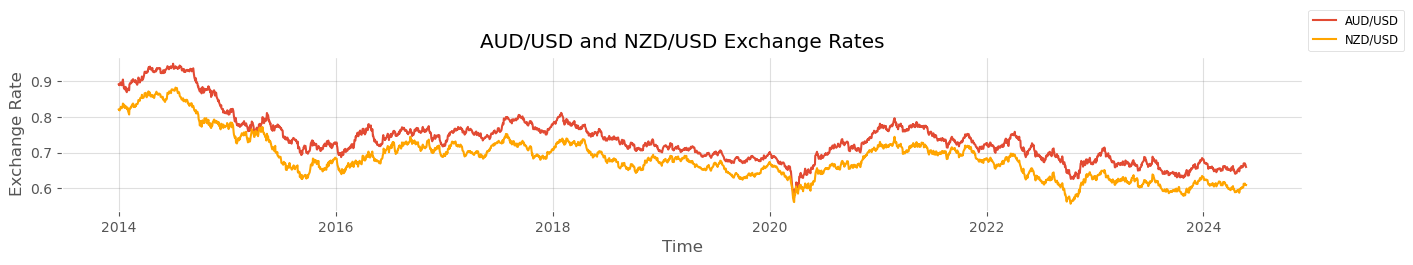

In [32]:
plt.figure(figsize=(16, 2))

# Plot CAD/USD
plt.plot(converted_us['AUDSGD=X'], label='AUD/USD')

# Plot CHF/USD
plt.plot(converted_us['NZDSGD=X'], label='NZD/USD', color = 'orange')

# Adding titles and labels
plt.title('AUD/USD and NZD/USD Exchange Rates')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend(loc='lower left', fontsize='small', bbox_to_anchor=(1, 1))

# Display the plot
plt.grid(True)

#plt.savefig('aud_nzd_exchange_rates.png', dpi=300, bbox_inches='tight')

plt.show()

In [33]:
converted_us.columns

Index(['SGD=X', 'SGDMYR=X', 'GBPSGD=X', 'EURSGD=X', 'SGDJPY=X', 'SGDHKD=X',
       'SGDIDR=X', 'SGDCNY=X', 'SGDTHB=X', 'SGDINR=X', 'SGDKRW=X', 'AUDSGD=X',
       'NZDSGD=X', 'GBPUSD=X', 'JPY=X', 'HKD=X', 'MYR=X', 'INR=X', 'CNY=X',
       'PHP=X', 'IDR=X', 'THB=X', 'CHF=X', 'MXN=X', 'AUDUSD=X', 'NZDUSD=X',
       'KRW=X', 'VND=X', 'CAD=X', 'EURJPY=X', 'GBPJPY=X', 'EURGBP=X',
       'EURSEK=X', 'EURCHF=X', 'EURHUF=X'],
      dtype='object')

In [34]:
needed_columns = ['SGD=X', 'CAD=X', 'AUDUSD=X', 'NZDUSD=X', 'CHF=X']

pairs_data = converted_us[needed_columns]

pairs_data

,SGD=X,CAD=X,AUDUSD=X,NZDUSD=X,CHF=X
Date,,,,,
2013-12-31,0.789278,0.939408,0.891981,0.821760,1.127142
2014-01-01,0.792198,0.941682,0.891504,0.822707,1.120210
2014-01-02,0.791133,0.939452,0.889205,0.820883,1.121705
2014-01-03,0.789297,0.937286,0.890631,0.818733,1.112174
2014-01-06,0.789609,0.940689,0.896539,0.826720,1.104936
...,...,...,...,...,...
2024-05-20,0.743588,0.734867,0.670071,0.613670,1.100473
2024-05-21,0.742203,0.734160,0.667209,0.610810,1.098756
2024-05-22,0.742269,0.733122,0.666710,0.609381,1.097502


In [35]:
pairs_data.corr()

,SGD=X,CAD=X,AUDUSD=X,NZDUSD=X,CHF=X
SGD=X,1.000000,0.813730,0.714773,0.686810,0.583876
CAD=X,0.813730,1.000000,0.909546,0.876810,0.315957
AUDUSD=X,0.714773,0.909546,1.000000,0.972972,0.138580
NZDUSD=X,0.686810,0.876810,0.972972,1.000000,0.121154
CHF=X,0.583876,0.315957,0.138580,0.121154,1.000000


## Traditional Method Formulas

1. **Spread Series**:
   - $ \text{Spread} = Y_t - \beta X_t - \alpha $

2. **Rolling Mean**:
   - $ \mu_t = \frac{1}{n} \sum_{i=t-n+1}^{t} \text{Spread}_i $

3. **Rolling Standard Deviation**:
   - $ \sigma_t = \sqrt{\frac{1}{n-1} \sum_{i=t-n+1}^{t} (\text{Spread}_i - \mu_t)^2} $

4. **Upper and Lower Bands**:
   - $ \text{Upper Band} = \mu_t + k \sigma_t $
   - $ \text{Lower Band} = \mu_t - k \sigma_t $

5. **Trading Signals**:
   - **Buy Signal**: When $ \text{Spread} < \text{Lower Band} $
   - **Sell Signal**: When $ \text{Spread} > \text{Upper Band} $

### Traditional Method

**Steps**:
1. **Generation of Spread Series**:
   $ \text{MSPREAD} = Y_t - (a + bX_t) $
   where $Y_t$ and $X_t$ are the log price series of two assets, and $a$ and $b$ are the intercept and slope coefficients obtained from OLS regression.

2. **Calculation of Mean and Standard Deviation**:
   $ \mu = \frac{1}{N} \sum_{t=1}^{N} \text{MSPREAD}_t $ \
   $ \sigma = \sqrt{\frac{1}{N} \sum_{t=1}^{N} (\text{MSPREAD}_t - \mu)^2} $

3. **Construction of Trading Signals**:
   - A buy signal is generated when the spread series is below $\mu - k\sigma$.
   - A sell signal is generated when the spread series is above $\mu + k\sigma$.
   - $ \text{Buy Signal} = \text{MSPREAD}_t < \mu - k\sigma $
   - $ \text{Sell Signal} = \text{MSPREAD}_t > \mu + k\sigma $

### GARCH Model Method

**Steps**:
1. **Generation of Spread Series**:
   $ \text{MSPREAD} = Y_t - (a + bX_t) $
   where $Y_t$ and $X_t$ are the log price series of two assets, and $a$ and $b$ are the intercept and slope coefficients obtained from OLS regression.

2. **Fitting an AR Model**:
   $ \text{MSPREAD}_t = c + \sum_{i=1}^{p} \phi_i \text{MSPREAD}_{t-i} + \epsilon_t $

3. **Fitting a GARCH Model**:
   $ \epsilon_t = \sigma_t z_t $
   $ \sigma_t^2 = \alpha_0 + \sum_{i=1}^{q} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{p} \beta_j \sigma_{t-j}^2 $

4. **Calculation of Time-Varying Standard Deviation**:
   Extract $\sigma_t$ from the GARCH model as the volatility of the spread series.

5. **Construction of Trading Signals**:
   - A buy signal is generated when the spread series is below $\mu - k\sigma_t$.
   - A sell signal is generated when the spread series is above $\mu + k\sigma_t$.
   - $ \text{Buy Signal} = \text{MSPREAD}_t < \mu - k\sigma_t $
   - $ \text{Sell Signal} = \text{MSPREAD}_t > \mu + k\sigma_t $

### Specific Formulas

**Traditional Method Formulas**:
$ \text{MSPREAD} = Y_t - (a + bX_t) $ \
$ \mu = \frac{1}{N} \sum_{t=1}^{N} \text{MSPREAD}_t $ \
$ \sigma = \sqrt{\frac{1}{N} \sum_{t=1}^{N} (\text{MSPREAD}_t - \mu)^2} $ \
$ \text{Buy Signal} = \text{MSPREAD}_t < \mu - k\sigma $ \
$ \text{Sell Signal} = \text{MSPREAD}_t > \mu + k\sigma $ 

**GARCH Model Method Formulas**:
$ \text{MSPREAD} = Y_t - (a + bX_t) $ \
$ \text{MSPREAD}_t = c + \sum_{i=1}^{p} \phi_i \text{MSPREAD}_{t-i} + \epsilon_t $\
$ \epsilon_t = \sigma_t z_t $ \
$ \sigma_t^2 = \alpha_0 + \sum_{i=1}^{q} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{p} \beta_j \sigma_{t-j}^2 $ \
$ \text{Buy Signal} = \text{MSPREAD}_t < \mu - k\sigma_t $ \
$ \text{Sell Signal} = \text{MSPREAD}_t > \mu + k\sigma_t $

In [36]:
def generate_signals(spread, k_entry=1.0):
    mean_spread = spread.mean()
    std_spread = spread.std()
    
    signals = np.zeros(len(spread))
    
    for i in range(len(spread)):
        if spread[i] > mean_spread + k_entry * std_spread:
            signals[i] = -1  # Sell Y, Buy X
        elif spread[i] < mean_spread - k_entry * std_spread:
            signals[i] = 1   # Buy Y, Sell X
    
    return signals

In [37]:
def calculate_performance_and_sharpe_TRAD(spread, risk_free_rate=0.01):
    positions = pd.DataFrame(index=spread.index)
    positions['Position'] = spread['Entry Signals'].shift(1)

    #daily_returns = spread['MSPREAD'].pct_change()
    daily_returns = spread['MSPREAD'].diff().shift(-1)#.pct_change()
    positions['Daily Return'] = positions['Position'] * daily_returns

    # Drop NaN values resulting from the shift operation
    positions.dropna(inplace=True)

    positions['Cumulative Return'] = (1 + positions['Daily Return']).cumprod() - 1

    excess_return = positions['Daily Return'] - risk_free_rate / 252
    
    sharpe_ratio = np.sqrt(252) * excess_return.mean() / excess_return.std()
    
    peak = positions['Cumulative Return'].cummax()
    max_drawdown = ((positions['Cumulative Return'] - peak) / peak).min()
    
    downside_returns = np.minimum(excess_return - positions['Daily Return'].mean(), 0)
    downside_deviation = np.sqrt(np.mean(downside_returns**2))
    sortino_ratio = np.sqrt(252) * excess_return.mean() / downside_deviation if downside_deviation != 0 else np.nan

    return positions, sharpe_ratio, max_drawdown, sortino_ratio

In [38]:
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

def select_ar_lag(data, max_lag=10):
    aic = []
    bic = []
    for lag in range(1, max_lag + 1):
        model_ar = AutoReg(data, lags=lag).fit()
        aic.append(model_ar.aic)
        bic.append(model_ar.bic)
    optimal_lag_aic = aic.index(min(aic)) + 1
    optimal_lag_bic = bic.index(min(bic)) + 1
    return optimal_lag_aic, optimal_lag_bic

In [39]:
# sigma2 and AR
optimal_lag_bic = 2
def rolling_forecast(data, ratio=0.8, ar_lags=optimal_lag_bic, garch_p=1, garch_q=1):
    num = int(len(data) * ratio)
    n = len(data) - num
    results = []
    for i in range(n):
        ar_model = AutoReg(data[i:num + i], lags=ar_lags).fit()
        if ar_lags == 2:
            c, l1, l2 = ar_model.params
            l3, l4, l5, l6, l7 = 0, 0, 0, 0, 0
        else:
            c, l1, l2, l3, l4, l5, l6, l7 = ar_model.params
        
        garch_model = arch_model(ar_model.resid, vol='Garch', p=garch_p, q=garch_q).fit(disp='off')
        forecast = garch_model.forecast(horizon=1)
        sigma2_forecast = forecast.variance.iloc[-1, 0]
        results.append({
            "c": c,
            "l1": l1,
            "l2": l2,
            "l3": l3,
            "l4": l4,
            "l5": l5,
            "l6": l6,
            "l7": l7,
            "sigma": np.sqrt(sigma2_forecast)
        })

    return results

In [157]:
# def assign_values(df):
#     # short y long 1/beta * x
#     # short ln(NZDSGD=X) long 1/0.9011 ln(AUDSGD=X)
#     if (df["spread"] > df["spread"].std()) & (df["spread"] < 2*df["spread"].std()):
#         return -1
#     elif (df["spread"] > -2*df["spread"].std()) & (df["spread"] < -df["spread"].std()):
#         return 1
#     elif (df["spread"] > -0.2*df["sigma"])&(df["spread"] < 0.2*df["sigma"]):
#         return 0
#     elif (df["spread"] < -2*df["sigma"])|(df["spread"] > 2*df["sigma"]):
#         return 0
#     else:
#         return 0

In [164]:
def assign_values(df):
    # short y long 1/beta * x
    # short ln(NZDSGD=X) long 1/0.9011 ln(AUDSGD=X)
    if (df["spread"] > df["sigma"] ) & (df["spread"] < 2*df["sigma"]):
        return -1
    elif (df["spread"] > -2*df["sigma"]) & (df["spread"] < -df["sigma"]):
        return 1
    elif (df["spread"] > -0.2*df["sigma"])&(df["spread"] < 0.2*df["sigma"]):
        return 0
    elif (df["spread"] < -2*df["sigma"])|(df["spread"] > 2*df["sigma"]):
        return 0
    else:
        return 0

In [42]:
def calculate_performance_and_sharpe_GARCH(spread, risk_free_rate=0.01):
    positions = pd.DataFrame(index=spread.index)
    positions['Position'] = spread['signal'].shift(1)

    daily_returns = spread['price'].pct_change()
    #daily_returns = spread['price'].diff().shift(-1)#.pct_change()
    positions['Daily Return'] = positions['Position'] * daily_returns

    # Drop NaN values resulting from the shift operation
    positions.dropna(inplace=True)

    positions['Cumulative Return'] = (1 + positions['Daily Return']).cumprod() - 1

    excess_return = positions['Daily Return'] - risk_free_rate / 252
    
    sharpe_ratio = np.sqrt(252) * excess_return.mean() / excess_return.std()
    
    peak = positions['Cumulative Return'].cummax()
    max_drawdown = ((positions['Cumulative Return'] - peak) / peak).min()
    
    downside_returns = np.minimum(excess_return - positions['Daily Return'].mean(), 0)
    downside_deviation = np.sqrt(np.mean(downside_returns**2))
    sortino_ratio = np.sqrt(252) * excess_return.mean() / downside_deviation if downside_deviation != 0 else np.nan

    return positions, sharpe_ratio, max_drawdown, sortino_ratio

In [43]:
# def calculate_performance_and_sharpe_GARCH(spread, signals, beta, risk_free_rate=0.01):
#     positions = pd.DataFrame(index=spread.index)
#     positions['Position'] = signals.shift(1) * beta

#     daily_returns = df['rice'].diff().shift(-1)  # Daily spread returns, shift to align with next day's position
#     positions['Daily Return'] = positions['Position'] * daily_returns

#     # Drop NaN values resulting from the shift operation
#     positions.dropna(inplace=True)

#     positions['Cumulative Return'] = (1 + positions['Daily Return']).cumprod() - 1

#     excess_return = positions['Daily Return'] - risk_free_rate / 252
#     sharpe_ratio = np.sqrt(252) * excess_return.mean() / excess_return.std()
    
#     peak = positions['Cumulative Return'].cummax()
#     max_drawdown = ((positions['Cumulative Return'] - peak) / peak).min()
    
#     downside_returns = np.minimum(excess_return - positions['Daily Return'].mean(), 0)
#     downside_deviation = np.sqrt(np.mean(downside_returns**2))
#     sortino_ratio = np.sqrt(252) * excess_return.mean() / downside_deviation if downside_deviation != 0 else np.nan

#     return positions, sharpe_ratio, max_drawdown, sortino_ratio

##  Traditional Pair 1: SGD=X and CAD=X

In [44]:
SGD = "SGD=X"
CAD = "CAD=X"

pair = converted_us[[SGD, CAD]].copy()
pair = np.log(pair)

ratio = 0.8
train1 = pair[:int(len(pair) * ratio)]
test1 = pair[int(len(pair) * ratio):]

X1 = train1[SGD]
Y1 = train1[CAD]

# Add a constant
X1 = sm.add_constant(X1)

# Fit the OLS model
model1 = sm.OLS(Y1, X1).fit()

print("SGD=X and CAD=X model summary")
print(model1.summary())

a1 = model1.params[0]
b1 = model1.params[1]
data1 = train1[CAD] - b1 * train1[SGD] - a1

print(f"a: {a1}, b: {b1}")
print(data1.head())

SGD=X and CAD=X model summary
                            OLS Regression Results                            
Dep. Variable:                  CAD=X   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     9439.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:49:56   Log-Likelihood:                 4741.7
No. Observations:                2171   AIC:                            -9479.
Df Residuals:                    2169   BIC:                            -9468.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2925 

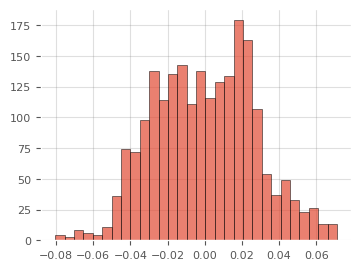

In [45]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera


# Convert the data to a pandas Series
series = pd.Series(data1, name='MSPREAD')

# Calculate descriptive statistics
mean = series.mean()
median = series.median()
maximum = series.max()
minimum = series.min()
std_dev = series.std()
skewness = skew(series)
kurt = kurtosis(series, fisher=True) + 3  # To match pandas' definition of kurtosis
jb_stat, jb_p_value = jarque_bera(series)

# Create the histogram
plt.figure(figsize=(4, 3))
plt.hist(series, bins=30, edgecolor='k', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=8)
#plt.title('Histogram of MSPREAD')

# Create text box with statistics
stats_text = f'''\
Series: {series.name}
Sample 1 {len(series)}
Observations {len(series)}

Mean: {mean:.6f}
Median: {median:.6f}
Maximum: {maximum:.6f}
Minimum: {minimum:.6f}
Std. Dev.: {std_dev:.6f}
Skewness: {skewness:.6f}
Kurtosis: {kurt:.6f}
Jarque-Bera: {jb_stat:.6f}
Probability: {jb_p_value:.6f}
'''

# Add the text box to the plot
# plt.gca().text(1.05, 0.5, stats_text, transform=plt.gca().transAxes, fontsize=8,
#                verticalalignment='center', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

#plt.savefig('histogram_mspread1.png', dpi = 300, bbox_inches='tight')

# Show the plot
plt.show()

- Entry Signal (Buy/Sell): When the spread deviates from the mean by ±1σ. 
- Close Position Signal: When the spread is within ±0.2σ of the mean. 
- Stop Loss Signal: When the spread deviates from the mean by ±2σ.

In [46]:
spread1 = pd.Series(data1, name='MSPREAD')
    
# Generate signals
entry_signals1 = generate_signals(spread1)

# Convert spread to DataFrame if it's not already
if not isinstance(spread1, pd.DataFrame):
    spread1 = spread1.to_frame()

# Add signals as new columns in the spread DataFrame
spread1['Entry Signals'] = entry_signals1

spread1.head()

,MSPREAD,Entry Signals
Date,,
2013-12-31 00:00:00,0.062901,-1.0
2014-01-01 00:00:00,0.058796,-1.0
2014-01-02 00:00:00,0.058802,-1.0
2014-01-03 00:00:00,0.060597,-1.0
2014-01-06 00:00:00,0.063525,-1.0


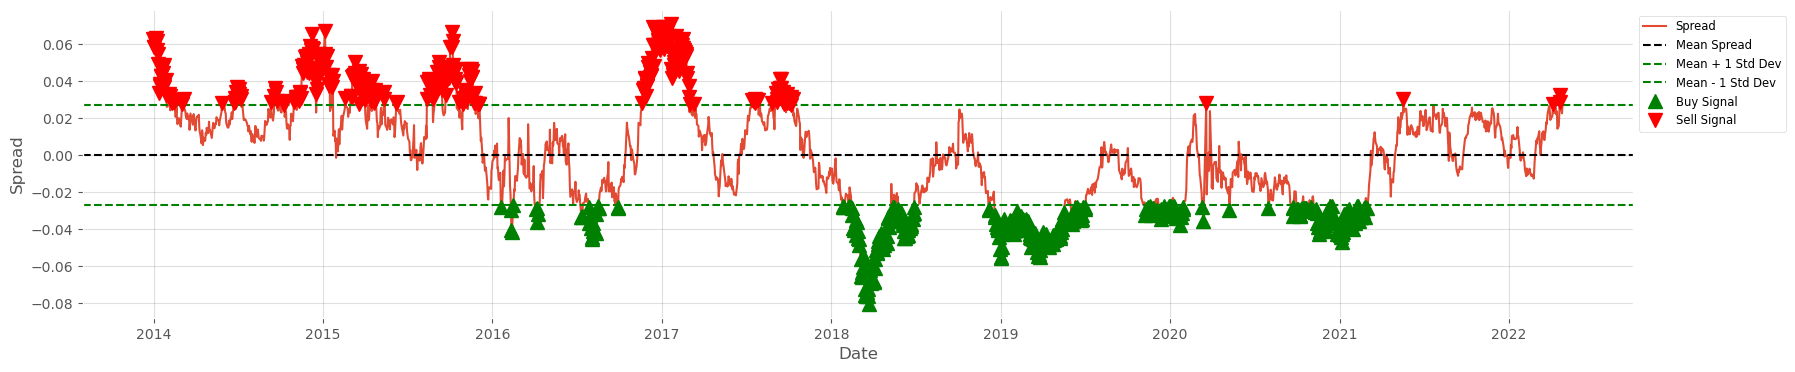

In [47]:
# Plot the spread and signals
plt.figure(figsize=(20, 4))

plt.plot(spread1.index, spread1['MSPREAD'], label='Spread')
plt.axhline(spread1['MSPREAD'].mean(), color='k', linestyle='--', label='Mean Spread')
plt.axhline(spread1['MSPREAD'].mean() + spread1['MSPREAD'].std(), color='g', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(spread1['MSPREAD'].mean() - spread1['MSPREAD'].std(), color='g', linestyle='--', label='Mean - 1 Std Dev')

# Plot signals
plt.plot(spread1.index[spread1['Entry Signals'] == 1], spread1['MSPREAD'][spread1['Entry Signals'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(spread1.index[spread1['Entry Signals'] == -1], spread1['MSPREAD'][spread1['Entry Signals'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

#plt.title('Spread and Trading Signals')
plt.legend(loc = 'best', fontsize = 'small', bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Spread')

plt.show()

In [48]:
beta1 = model.params[1]
positions1, sharpe_ratio1, max_drawdown1, sortino_ratio1 = calculate_performance_and_sharpe_TRAD(spread1)

In [49]:
cumulative_return1 = positions1['Cumulative Return'].iloc[-1] 
print(f"Cumulative Return: {(cumulative_return1):.2f}")
print(f"Sharpe Ratio: {sharpe_ratio1:.2f}")
print(f"Maximum Drawdown: {max_drawdown1:.2f}")
print(f"Sortino Ratio: {sortino_ratio1:.2f}")

Cumulative Return: 0.48
Sharpe Ratio: 0.78
Maximum Drawdown: -0.60
Sortino Ratio: 1.16


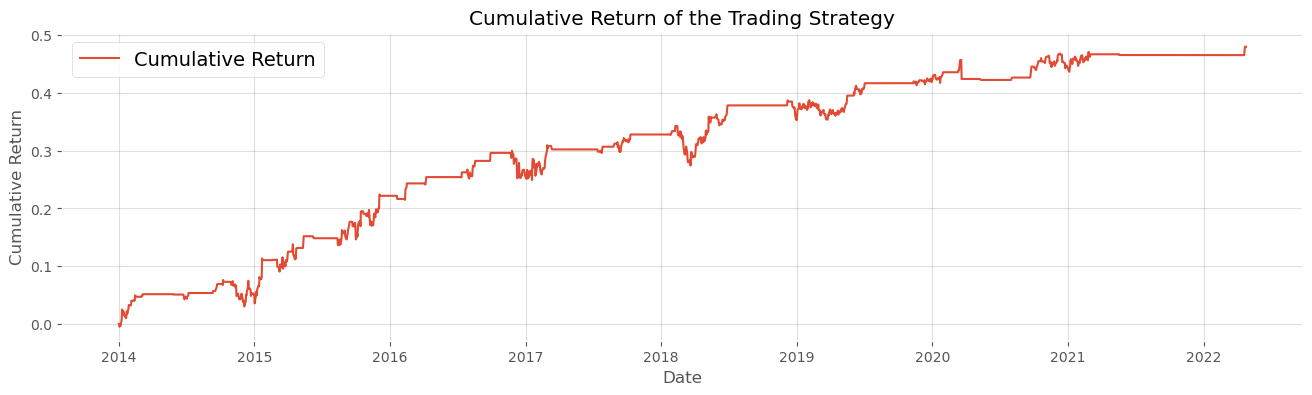

In [50]:
plt.figure(figsize=(16, 4))
plt.plot(positions1.index, positions1['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

### Test

In [51]:
spread_test1 = test1[CAD] - b1 * test1[SGD] - a1

spread_test_series1 = pd.Series(spread_test1, name='MSPREAD')

In [52]:
# Generate signals
entry_signals_test1 = generate_signals(spread_test_series1)

# Convert spread to DataFrame if it's not already
if not isinstance(spread_test_series1, pd.DataFrame):
    spread_test_series1 = spread_test_series1.to_frame()

# Add signals as new columns in the spread DataFrame
spread_test_series1['Entry Signals'] = entry_signals_test1

spread_test_series1.head()

,MSPREAD,Entry Signals
Date,,
2022-04-27 00:00:00,0.026184,-1.0
2022-04-28 00:00:00,0.029358,-1.0
2022-04-29 00:00:00,0.037406,-1.0
2022-05-02 00:00:00,0.030063,-1.0
2022-05-03 00:00:00,0.030905,-1.0


In [53]:
spread_test_series1['Entry Signals'].value_counts()

Entry Signals
 0.0    365
-1.0    141
 1.0     37
Name: count, dtype: int64

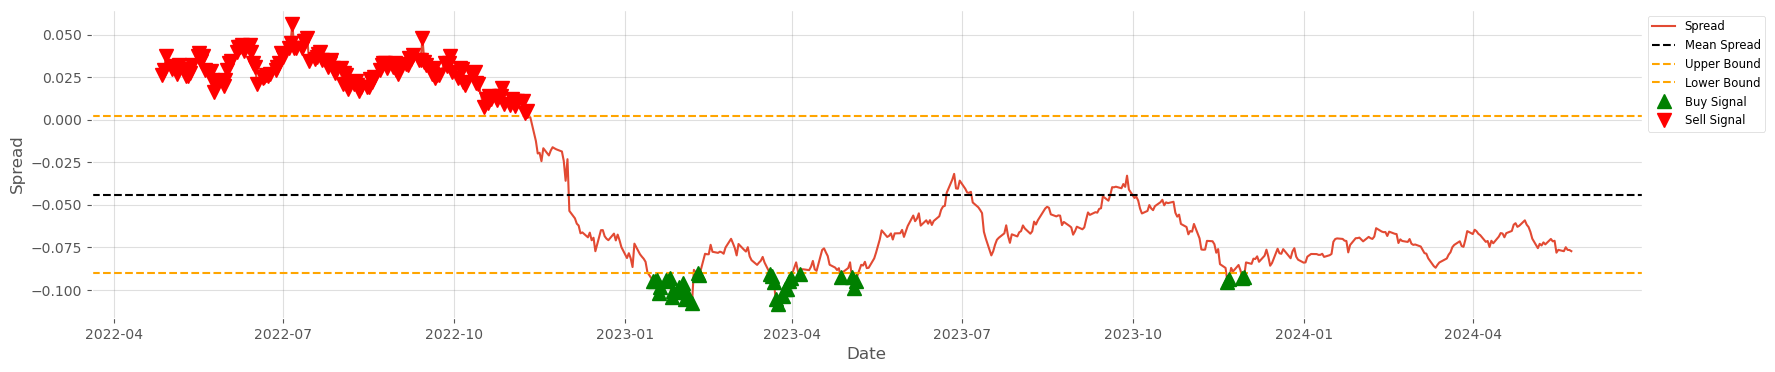

In [54]:
# Plot the spread and signals
plt.figure(figsize=(20, 4))

plt.plot(spread_test_series1.index, spread_test_series1['MSPREAD'], label='Spread')
plt.axhline(spread_test_series1['MSPREAD'].mean(), color='k', linestyle='--', label='Mean Spread')
plt.axhline(spread_test_series1['MSPREAD'].mean() + spread_test_series1['MSPREAD'].std(), color='orange', linestyle='--', label='Upper Bound')
plt.axhline(spread_test_series1['MSPREAD'].mean() - spread_test_series1['MSPREAD'].std(), color='orange', linestyle='--', label='Lower Bound')

# Plot signals
plt.plot(spread_test_series1.index[spread_test_series1['Entry Signals'] == 1], spread_test_series1['MSPREAD'][spread_test_series1['Entry Signals'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(spread_test_series1.index[spread_test_series1['Entry Signals'] == -1], spread_test_series1['MSPREAD'][spread_test_series1['Entry Signals'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

#plt.title('Spread and Trading Signals')
plt.legend(loc = 'best', fontsize = 'small', bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Spread')

#plt.savefig('trading_signal1.png', dpi = 300, bbox_inches='tight')

plt.show()

In [55]:
positions1_test, sharpe_ratio1_test, max_drawdown1_test, sortino_ratio1_test = calculate_performance_and_sharpe_TRAD(spread_test_series1)

In [56]:
cumulative_return1_test = positions1_test['Cumulative Return'].iloc[-1] 
print(f"Cumulative Return: {(cumulative_return1_test)* 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio1_test:.2f}")
print(f"Maximum Drawdown: {max_drawdown1_test:.2f}")
print(f"Sortino Ratio: {sortino_ratio1_test:.2f}")

Cumulative Return: 7.55%
Sharpe Ratio: 0.54
Maximum Drawdown: -3.85
Sortino Ratio: 0.87


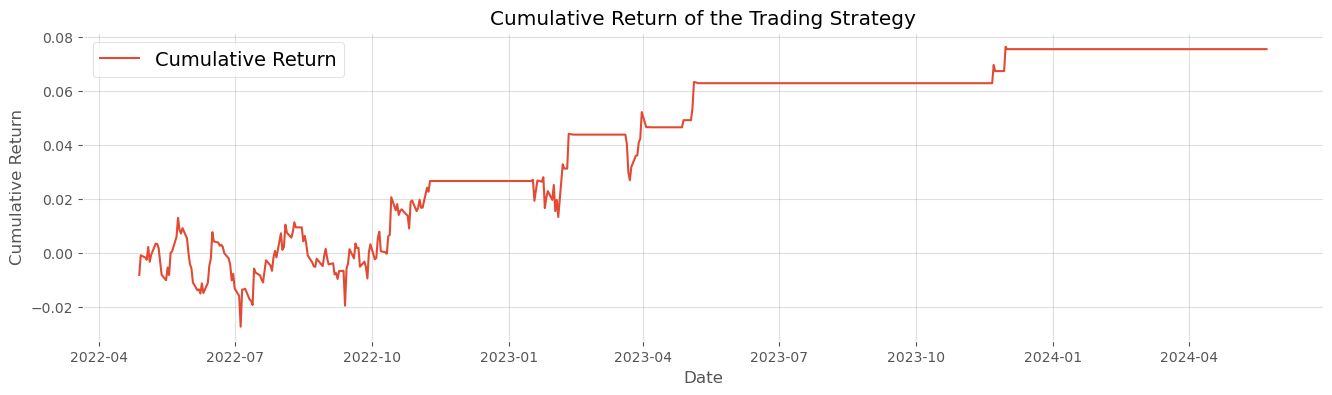

In [57]:
plt.figure(figsize=(16, 4))
plt.plot(positions1_test.index, positions1_test['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

## GARCH Pair 1: SGD = X and CAD = X

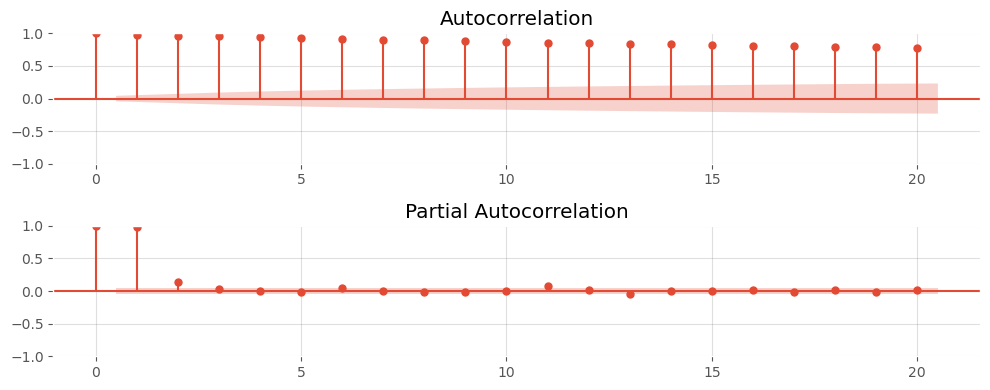

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, q_stat

# Convert the data to a pandas Series
series1 = pd.Series(data1, name='MSPREAD')

# Calculate autocorrelation and partial autocorrelation
acf_values = acf(series1, nlags=20)
pacf_values = pacf(series1, nlags=20)
q_stat_values, p_values = q_stat(acf_values[1:], len(series1))

# Plot the autocorrelation and partial autocorrelation
fig, ax = plt.subplots(2, 1, figsize=(10, 4))

plot_acf(series1, lags=20, ax=ax[0])
ax[0].set_title('Autocorrelation')

plot_pacf(series1, lags=20, ax=ax[1])
ax[1].set_title('Partial Autocorrelation')


plt.tight_layout()
#plt.savefig('pacf.png', dpi = 300, bbox_inches='tight')
plt.show()

# # Display the statistics
# print("Lag  AC      PAC     Q-Stat  Prob")
# for i in range(1, 21):
#     print(f"{i:>3}  {acf_values[i]:.3f}  {pacf_values[i]:.3f}  {q_stat_values[i-1]:.3f}  {p_values[i-1]:.3f}")

In [59]:
# Display the statistics
print("Lag  AC      PAC     Q-Stat  Prob")
for i in range(1, 21):
    print(f"{i:>3}  {acf_values[i]:.3f}  {pacf_values[i]:.3f}  {q_stat_values[i-1]:.3f}  {p_values[i-1]:.3f}")

Lag  AC      PAC     Q-Stat  Prob
  1  0.980  0.981  2088.677  0.000
  2  0.966  0.148  4120.065  0.000
  3  0.954  0.041  6098.488  0.000
  4  0.941  0.009  8025.293  0.000
  5  0.927  -0.017  9898.870  0.000
  6  0.916  0.041  11727.589  0.000
  7  0.904  -0.002  13510.443  0.000
  8  0.892  -0.010  15247.174  0.000
  9  0.880  -0.010  16937.916  0.000
 10  0.868  -0.006  18583.686  0.000
 11  0.859  0.081  20196.940  0.000
 12  0.851  0.024  21778.171  0.000
 13  0.840  -0.043  23321.115  0.000
 14  0.830  -0.005  24827.938  0.000
 15  0.820  0.001  26300.146  0.000
 16  0.811  0.019  27739.974  0.000
 17  0.801  -0.015  29145.467  0.000
 18  0.792  0.016  30520.975  0.000
 19  0.783  -0.007  31865.494  0.000
 20  0.774  0.009  33180.892  0.000


In [60]:
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

def select_ar_lag(data, max_lag=10):
    aic = []
    bic = []
    for lag in range(1, max_lag + 1):
        model_ar = AutoReg(data, lags=lag).fit()
        aic.append(model_ar.aic)
        bic.append(model_ar.bic)
    optimal_lag_aic = aic.index(min(aic)) + 1
    optimal_lag_bic = bic.index(min(bic)) + 1
    return optimal_lag_aic, optimal_lag_bic

optimal_lag_aic, optimal_lag_bic = select_ar_lag(data1)
print(f"Optimal AR lag by AIC: {optimal_lag_aic}")
print(f"Optimal AR lag by BIC: {optimal_lag_bic}")

Optimal AR lag by AIC: 2
Optimal AR lag by BIC: 2


In [61]:
model_ar1 = AutoReg(data1, lags=optimal_lag_bic).fit()

print(model_ar1.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 2171
Model:                     AutoReg(2)   Log Likelihood                8355.491
Method:               Conditional MLE   S.D. of innovations              0.005
Date:                Fri, 14 Jun 2024   AIC                         -16702.982
Time:                        10:49:57   BIC                         -16680.254
Sample:                    01-02-2014   HQIC                        -16694.671
                         - 04-26-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.842e-05      0.000     -0.167      0.867      -0.000       0.000
y.L1           0.8322      0.021     39.207      0.000       0.791       0.874
y.L2           0.1511      0.021      7.126      0.0

In [62]:
garch_model1 = arch_model(model_ar1.resid, vol='Garch', p=1, q=1).fit(disp='off')
forecast1 = garch_model1.forecast(horizon=1)

print(garch_model1.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8555.55
Distribution:                  Normal   AIC:                          -17103.1
Method:            Maximum Likelihood   BIC:                          -17080.4
                                        No. Observations:                 2169
Date:                Fri, Jun 14 2024   Df Residuals:                     2168
Time:                        10:49:57   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.2465e-18  1.202e-06 -1.869e-12      1.

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [63]:
std_resid = garch_model1.std_resid
lm_test = het_arch(std_resid)
print(f"Lagrange Multiplier Test Statistic: {lm_test[0]}")
print(f"p-value: {lm_test[1]}")

Lagrange Multiplier Test Statistic: 24.1817948823113
p-value: 0.007132199732717772


In [64]:
optimal_lag_aic = 2
optimal_lag_bic = 2

results1 = rolling_forecast(data1)

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/si

In [65]:
min_length = min(len(results1), len(pair[int(len(pair) * 0.8):]))
results1 = results1[:min_length]
index_slice = pair[int(len(pair) * 0.8):int(len(pair) * 0.8) + min_length].index

In [165]:
# Align the index and make sure the lengths match
test = pair[int(len(pair) * 0.8):]
test = test1[CAD] - b1 * test1[SGD] - a1
# test['price'] = 1/b1 * test1[SGD] - test1[CAD]

df = pd.DataFrame(results1, index=index_slice)
df = pd.concat([test[:len(df)], df], axis=1)
df = df.rename(columns={df.columns[0]: "spread"})
df["spread"] = (df["spread"] -
                df["c"] -
                df["l1"] * df["spread"].shift(1) -
                df["l2"] * df["spread"].shift(2) -
                df["l3"] * df["spread"].shift(3) -
                df["l4"] * df["spread"].shift(4) -
                df["l5"] * df["spread"].shift(5) -
                df["l6"] * df["spread"].shift(6) -
                df["l7"] * df["spread"].shift(7))
df1 = df.dropna()
df1["signal"] = df1.apply(assign_values, axis=1)
df1['price'] = 1/b1 * test1[SGD] - test1[CAD]

df1

,spread,c,l1,l2,l3,l4,l5,l6,l7,sigma,signal,price
Date,,,,,,,,,,,,
2022-05-06,0.005170,-0.000036,0.814332,0.168682,0,0,0,0,0,0.004304,-1,0.064972
2022-05-09,-0.001090,-0.000029,0.812855,0.170771,0,0,0,0,0,0.004248,0,0.070615
2022-05-10,-0.004053,-0.000029,0.813402,0.170117,0,0,0,0,0,0.004221,0,0.076668
2022-05-11,-0.000172,-0.000029,0.813422,0.170083,0,0,0,0,0,0.004146,0,0.077833
2022-05-12,0.002086,-0.000035,0.813464,0.169909,0,0,0,0,0,0.004194,0,0.075395
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,-0.001900,-0.000103,0.833075,0.150358,0,0,0,0,0,0.004317,0,0.127009
2023-12-21,0.001487,-0.000099,0.835067,0.148477,0,0,0,0,0,0.209573,0,0.127356
2023-12-22,-0.002092,-0.000097,0.835720,0.147898,0,0,0,0,0,0.005087,0,0.123998


In [166]:
df1['signal'].value_counts()

signal
 0    389
-1     21
 1     18
Name: count, dtype: int64

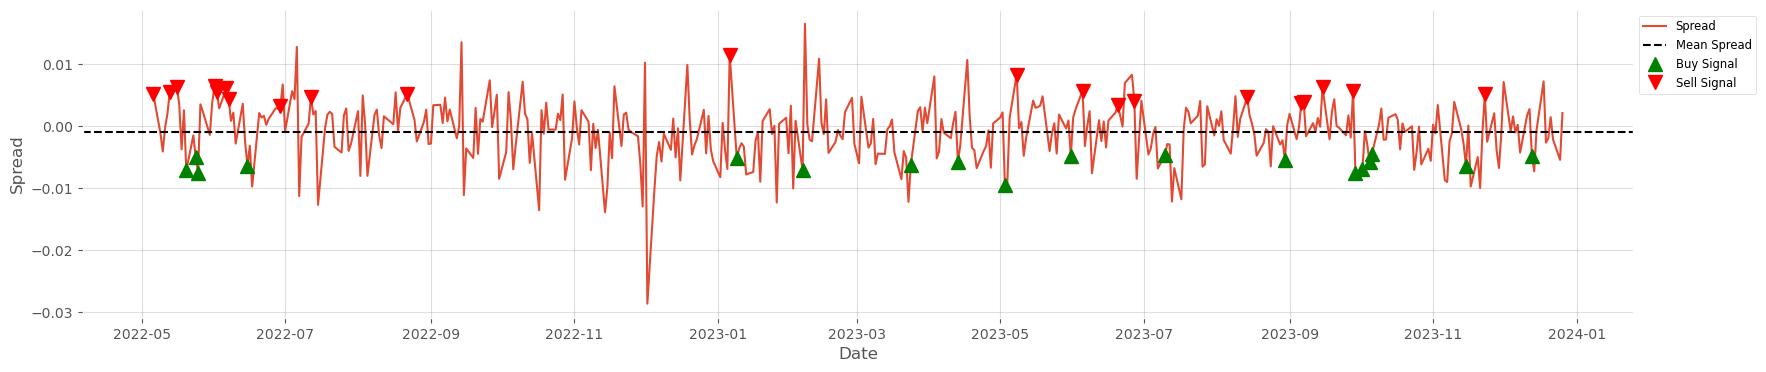

In [167]:
# 绘制图形
plt.figure(figsize=(20, 4))

plt.plot(df1.index, df1['spread'], label='Spread')
plt.axhline(df1['spread'].mean(), color='k', linestyle='--', label='Mean Spread')
# plt.axhline(df1['spread'].std(), color='orange', linestyle='--', label='Upper Bound')
# plt.axhline(- df1['spread'].std(), color='orange', linestyle='--', label='Lower Bound')

# 绘制交易信号
plt.plot(df1.index[df1['signal'] == 1], df1['spread'][df1['signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(df1.index[df1['signal'] == -1], df1['spread'][df1['signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

#plt.title('Spread and Trading Signals')
plt.legend(loc='best', fontsize='small', bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Spread')

#plt.xlim(dates[0], pd.to_datetime('2024-05-24'))

plt.savefig('garch1.png', dpi = 300, bbox_inches='tight')

plt.show()

In [168]:
positions2, sharpe_ratio2, max_drawdown2, sortino_ratio2 = calculate_performance_and_sharpe_GARCH(df1)

In [169]:
cumulative_return2 = positions2['Cumulative Return'].iloc[-1] 
print(f"Cumulative Return: {(cumulative_return2)*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio2:.2f}")
print(f"Maximum Drawdown: {max_drawdown2:.2f}")
print(f"Sortino Ratio: {sortino_ratio2:.2f}")

Cumulative Return: 3.56%
Sharpe Ratio: 0.15
Maximum Drawdown: -0.97
Sortino Ratio: 0.25


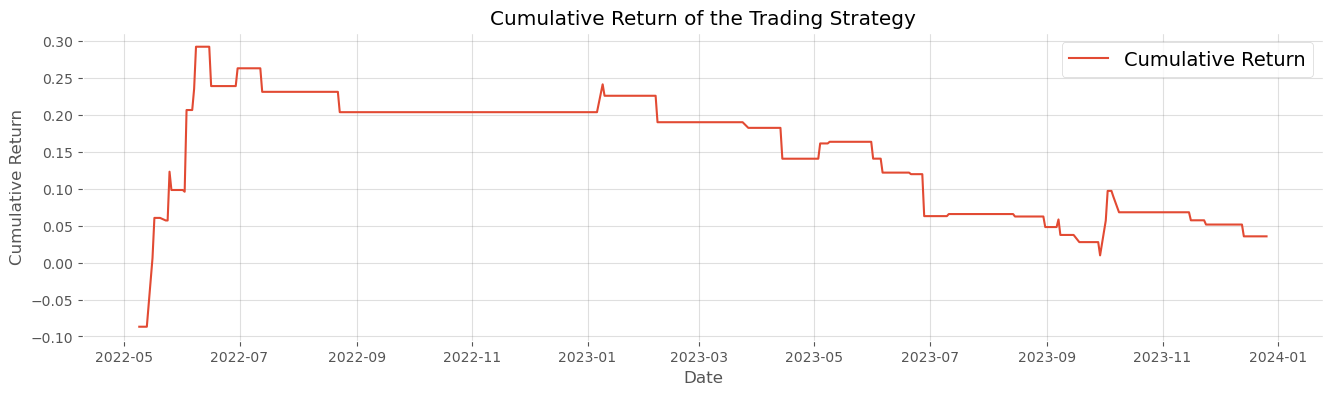

In [151]:
plt.figure(figsize=(16, 4))
plt.plot(positions2.index, positions2['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


#### Signal Filtering

The current strategy does not filter out noise, leading to frequent trading signals during large price fluctuations, increasing transaction costs and reducing returns.

#### Stop-Loss and Take-Profit

There are no stop-loss or take-profit strategies, which are essential for risk control and profit locking in actual trading.

#### Transaction Costs

The code does not account for transaction costs like bid-ask spreads and commissions, which affect the strategy's actual returns and should be considered in the evaluation.

## Traditional Pair 2: AUDUSD=X & NZDUSD=X

In [73]:
AUD = "AUDUSD=X"
NZD = "NZDUSD=X"

pair = pairs_data[[AUD, NZD]].copy()
pair = np.log(pair)

ratio = 0.8
train2 = pair[:int(len(pair) * ratio)]
test2 = pair[int(len(pair) * ratio):]

X2 = train2[[AUD]]
Y2 = train2[NZD]

# Add a constant
X2 = sm.add_constant(X2)

# Fit the OLS model
model2 = sm.OLS(Y2, X2).fit()

print("AUDUSD=X and NZDUSD=X model summary")
print(model2.summary())

a2 = model2.params[0]
b2 = model2.params[1]
data2 = train2[NZD] - b2 * train2[AUD] - a2

print(f"a: {a2}, b: {b2}")
print(data2.head())

AUDUSD=X and NZDUSD=X model summary
                            OLS Regression Results                            
Dep. Variable:               NZDUSD=X   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 3.036e+04
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:50:07   Log-Likelihood:                 5363.8
No. Observations:                2171   AIC:                        -1.072e+04
Df Residuals:                    2169   BIC:                        -1.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0

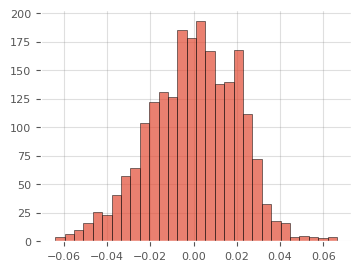

In [74]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera

# Convert the data to a pandas Series
series = pd.Series(data2, name='MSPREAD')

# Calculate descriptive statistics
mean = series.mean()
median = series.median()
maximum = series.max()
minimum = series.min()
std_dev = series.std()
skewness = skew(series)
kurt = kurtosis(series, fisher=True) + 3  # To match pandas' definition of kurtosis
jb_stat, jb_p_value = jarque_bera(series)

# Create the histogram
plt.figure(figsize=(4, 3))
plt.hist(series, bins=30, edgecolor='k', alpha=0.7)
#plt.title('Histogram of MSPREAD')
plt.tick_params(axis='both', which='major', labelsize=8)

# Create text box with statistics
stats_text = f'''\
Series: {series.name}
Sample 1 {len(series)}
Observations {len(series)}

Mean: {mean:.6f}
Median: {median:.6f}
Maximum: {maximum:.6f}
Minimum: {minimum:.6f}
Std. Dev.: {std_dev:.6f}
Skewness: {skewness:.6f}
Kurtosis: {kurt:.6f}
Jarque-Bera: {jb_stat:.6f}
Probability: {jb_p_value:.6f}
'''

# Add the text box to the plot
# plt.gca().text(1.05, 0.5, stats_text, transform=plt.gca().transAxes, fontsize=12,
#                verticalalignment='center', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

#plt.savefig('histogram_mspread2.png', dpi = 300, bbox_inches='tight')

# Show the plot
plt.show()

In [75]:
spread2 = pd.Series(data2, name='MSPREAD')
    
# Generate signals
entry_signals2 = generate_signals(spread2)

# Convert spread to DataFrame if it's not already
if not isinstance(spread2, pd.DataFrame):
    spread2 = spread2.to_frame()

# Add signals as new columns in the spread DataFrame
spread2['Entry Signals'] = entry_signals2

spread2.head()

,MSPREAD,Entry Signals
Date,,
2013-12-31 00:00:00,0.002037,0.0
2014-01-01 00:00:00,0.003674,0.0
2014-01-02 00:00:00,0.003801,0.0
2014-01-03 00:00:00,-0.000278,0.0
2014-01-06 00:00:00,0.003423,0.0


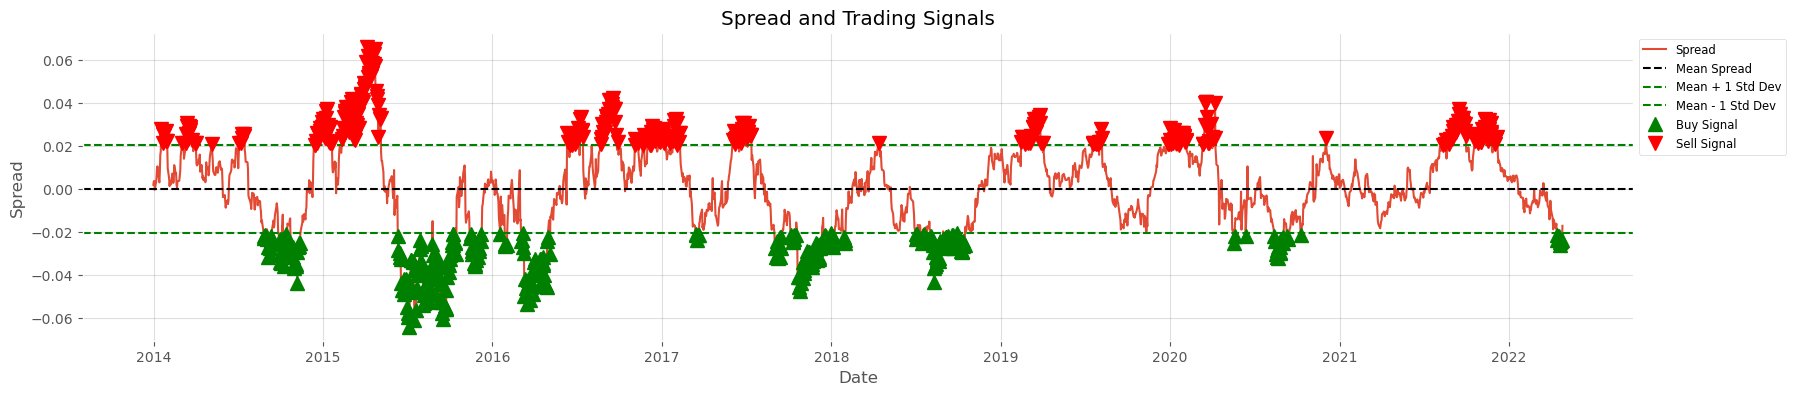

In [76]:
# Plot the spread and signals
plt.figure(figsize=(20, 4))

plt.plot(spread2.index, spread2['MSPREAD'], label='Spread')
plt.axhline(spread2['MSPREAD'].mean(), color='k', linestyle='--', label='Mean Spread')
plt.axhline(spread2['MSPREAD'].mean() + spread2['MSPREAD'].std(), color='g', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(spread2['MSPREAD'].mean() - spread2['MSPREAD'].std(), color='g', linestyle='--', label='Mean - 1 Std Dev')

# Plot signals
plt.plot(spread2.index[spread2['Entry Signals'] == 1], spread2['MSPREAD'][spread2['Entry Signals'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(spread2.index[spread2['Entry Signals'] == -1], spread2['MSPREAD'][spread2['Entry Signals'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Spread and Trading Signals')
plt.legend(loc = 'best', fontsize = 'small', bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Spread')
plt.show()

In [77]:
beta2 = model2.params[1]
positions3, sharpe_ratio3, max_drawdown3, sortino_ratio3 = calculate_performance_and_sharpe_TRAD(spread2)

In [78]:
cumulative_return3 = positions3['Cumulative Return'].iloc[-1] 
print(f"Cumulative Return: {(cumulative_return3):.2f}")
print(f"Sharpe Ratio: {sharpe_ratio3:.2f}")
print(f"Maximum Drawdown: {max_drawdown3:.2f}")
print(f"Sortino Ratio: {sortino_ratio3:.2f}")

Cumulative Return: 0.47
Sharpe Ratio: 0.80
Maximum Drawdown: -inf
Sortino Ratio: 1.19


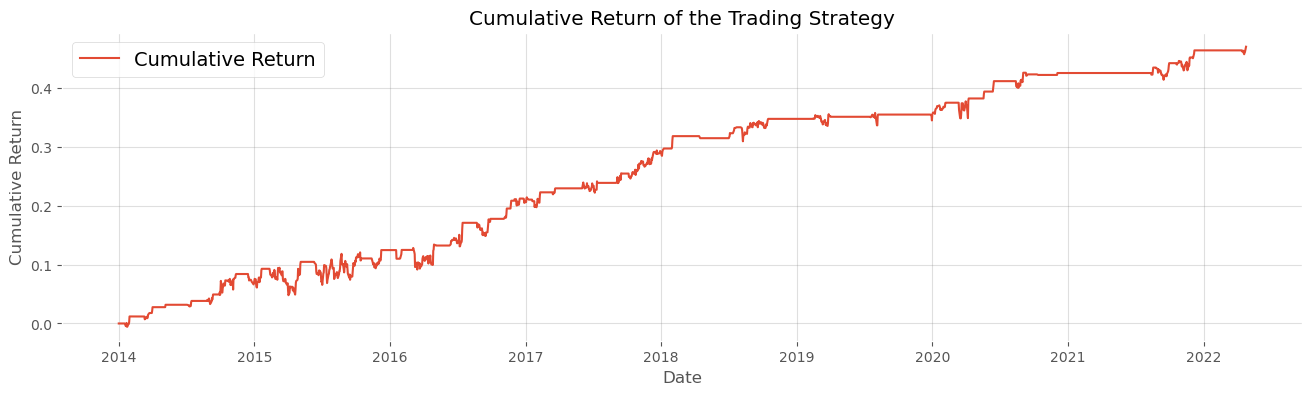

In [79]:
plt.figure(figsize=(16, 4))
plt.plot(positions3.index, positions3['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

### Test

In [80]:
spread_test2 = test2[NZD] - b2 * test2[AUD] - a2

spread_test_series2 = pd.Series(spread_test2, name='MSPREAD')

In [81]:
# Generate signals
entry_signals_test2 = generate_signals(spread_test_series2)

# Convert spread to DataFrame if it's not already
if not isinstance(spread_test_series2, pd.DataFrame):
    spread_test_series2 = spread_test_series2.to_frame()

# Add signals as new columns in the spread DataFrame
spread_test_series2['Entry Signals'] = entry_signals_test2

spread_test_series2.head()

,MSPREAD,Entry Signals
Date,,
2022-04-27 00:00:00,-0.019461,0.0
2022-04-28 00:00:00,-0.021973,0.0
2022-04-29 00:00:00,-0.027355,0.0
2022-05-02 00:00:00,-0.027484,0.0
2022-05-03 00:00:00,-0.027940,0.0


In [82]:
spread_test_series2['Entry Signals'].value_counts()

Entry Signals
 0.0    400
-1.0     78
 1.0     65
Name: count, dtype: int64

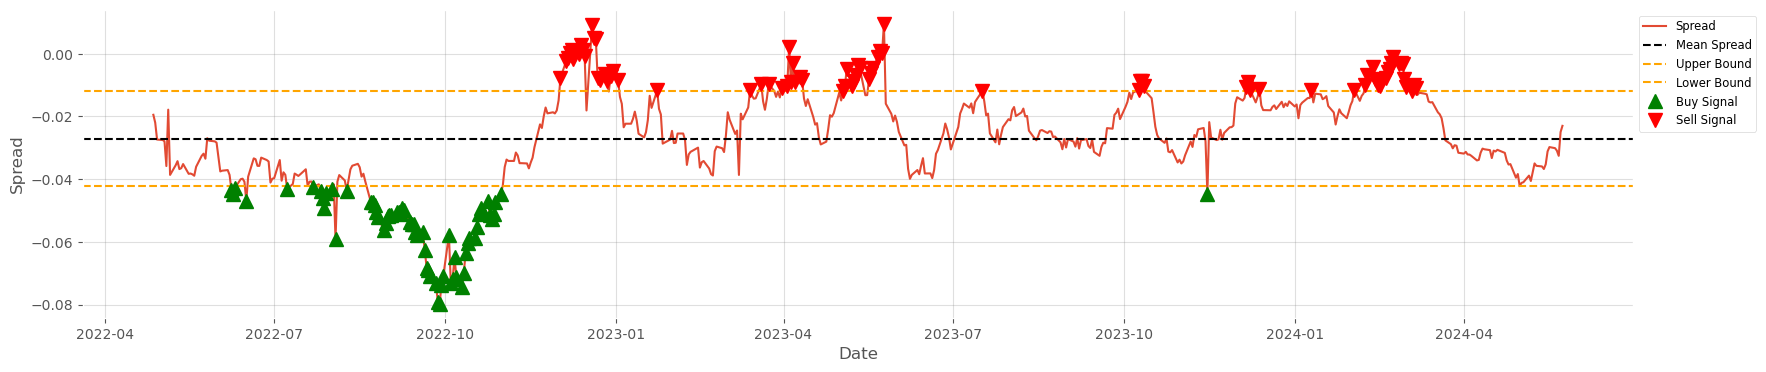

In [83]:
# Plot the spread and signals
plt.figure(figsize=(20, 4))

plt.plot(spread_test_series2.index, spread_test_series2['MSPREAD'], label='Spread')
plt.axhline(spread_test_series2['MSPREAD'].mean(), color='k', linestyle='--', label='Mean Spread')
plt.axhline(spread_test_series2['MSPREAD'].mean() + spread_test_series2['MSPREAD'].std(), color='orange', linestyle='--', label='Upper Bound')
plt.axhline(spread_test_series2['MSPREAD'].mean() - spread_test_series2['MSPREAD'].std(), color='orange', linestyle='--', label='Lower Bound')

# Plot signals
plt.plot(spread_test_series2.index[spread_test_series2['Entry Signals'] == 1], spread_test_series2['MSPREAD'][spread_test_series2['Entry Signals'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(spread_test_series2.index[spread_test_series2['Entry Signals'] == -1], spread_test_series2['MSPREAD'][spread_test_series2['Entry Signals'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

#plt.title('Spread and Trading Signals')
plt.legend(loc = 'best', fontsize = 'small', bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Spread')
#plt.savefig('trading_signal1.png', dpi = 300, bbox_inches='tight')
plt.show()

In [84]:
positions8, sharpe_ratio8, max_drawdown8, sortino_ratio8 = calculate_performance_and_sharpe_TRAD(spread_test_series2)

In [85]:
cumulative_return8 = positions8['Cumulative Return'].iloc[-1] 
print(f"Cumulative Return: {(cumulative_return8)*100:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio8:.2f}")
print(f"Maximum Drawdown: {max_drawdown8:.2f}")
print(f"Sortino Ratio: {sortino_ratio8:.2f}")

Cumulative Return: 6.87
Sharpe Ratio: 0.50
Maximum Drawdown: -2.69
Sortino Ratio: 0.71


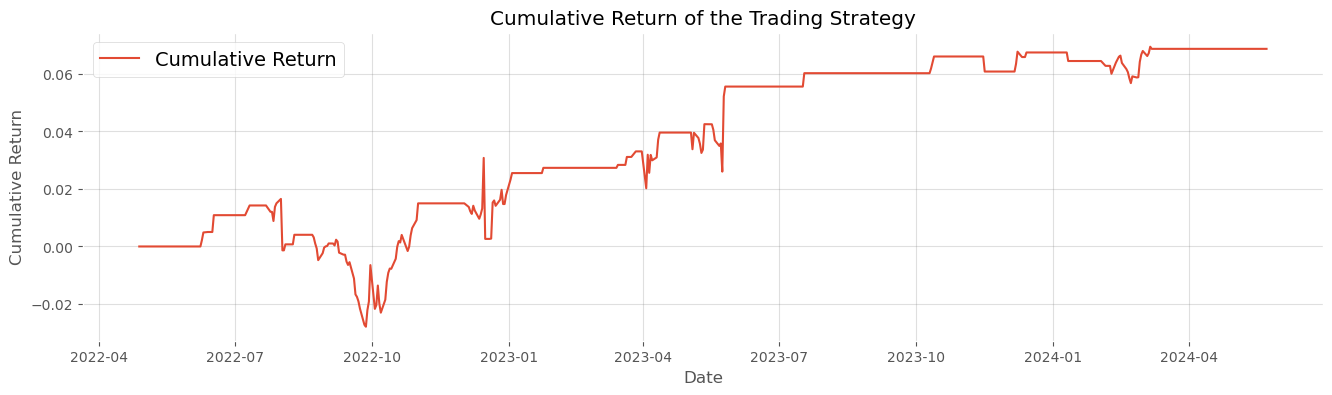

In [86]:
plt.figure(figsize=(16, 4))
plt.plot(positions8.index, positions8['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

## garch Pair 2: AUDUSD=X and NZDUSD=X

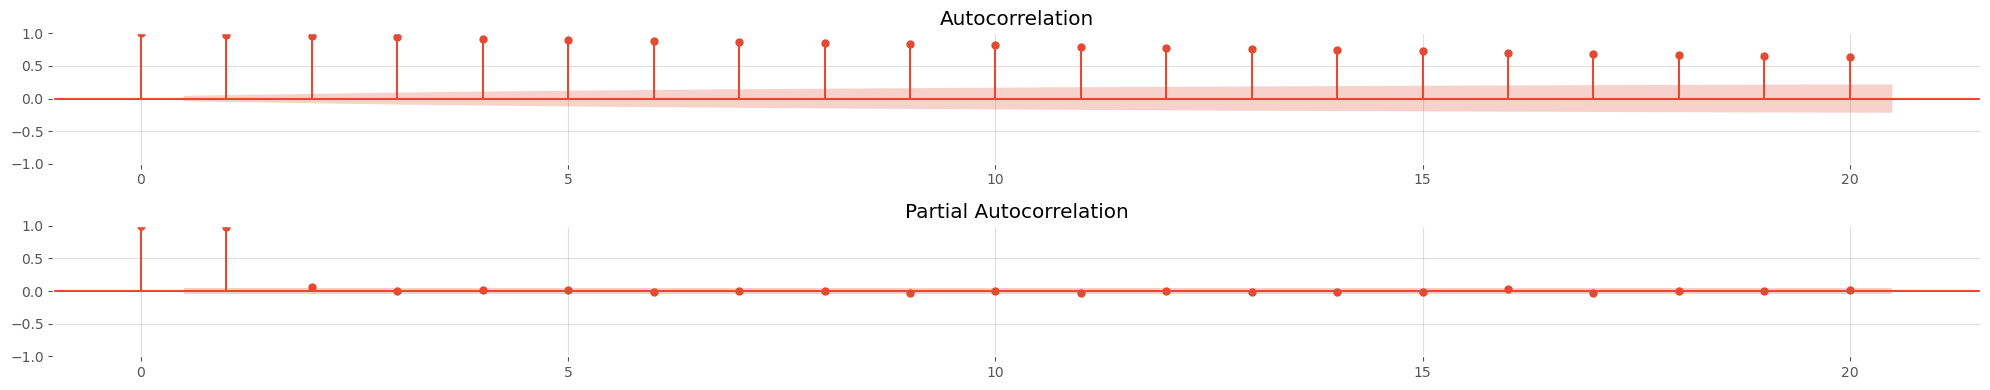

In [87]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, q_stat

# Convert the data to a pandas Series
series2 = pd.Series(data2, name='MSPREAD')

# Calculate autocorrelation and partial autocorrelation
acf_values = acf(series2, nlags=20)
pacf_values = pacf(series2, nlags=20)
q_stat_values, p_values = q_stat(acf_values[1:], len(series2))

# Plot the autocorrelation and partial autocorrelation
fig, ax = plt.subplots(2, 1, figsize=(20, 4))

plot_acf(series2, lags=20, ax=ax[0])
ax[0].set_title('Autocorrelation')

plot_pacf(series2, lags=20, ax=ax[1])
ax[1].set_title('Partial Autocorrelation')

plt.tight_layout()
#plt.savefig('pacf.png', dpi = 300, bbox_inches='tight')

plt.show()

In [88]:
# Display the statistics
print("Lag  AC      PAC     Q-Stat  Prob")
for i in range(1, 21):
    print(f"{i:>3}  {acf_values[i]:.3f}  {pacf_values[i]:.3f}  {q_stat_values[i-1]:.3f}  {p_values[i-1]:.3f}")

Lag  AC      PAC     Q-Stat  Prob
  1  0.977  0.978  2075.836  0.000
  2  0.958  0.064  4070.662  0.000
  3  0.939  0.003  5987.444  0.000
  4  0.921  0.017  7832.261  0.000
  5  0.904  0.020  9610.911  0.000
  6  0.886  -0.021  11321.769  0.000
  7  0.869  -0.004  12967.180  0.000
  8  0.852  -0.006  14548.577  0.000
  9  0.833  -0.034  16063.178  0.000
 10  0.815  -0.002  17514.398  0.000
 11  0.797  -0.030  18900.350  0.000
 12  0.778  -0.002  20224.474  0.000
 13  0.760  -0.021  21486.525  0.000
 14  0.741  -0.012  22687.986  0.000
 15  0.723  -0.013  23830.260  0.000
 16  0.706  0.027  24919.870  0.000
 17  0.687  -0.035  25954.077  0.000
 18  0.669  -0.006  26935.369  0.000
 19  0.652  0.007  27866.957  0.000
 20  0.636  0.016  28753.153  0.000


In [89]:
optimal_lag_aic, optimal_lag_bic = select_ar_lag(data2)
print(f"Optimal AR lag by AIC: {optimal_lag_aic}")
print(f"Optimal AR lag by BIC: {optimal_lag_bic}")

Optimal AR lag by AIC: 1
Optimal AR lag by BIC: 1


In [90]:
model_ar2 = AutoReg(data2, lags=1).fit()

print(model_ar2.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 2171
Model:                     AutoReg(1)   Log Likelihood                8729.353
Method:               Conditional MLE   S.D. of innovations              0.004
Date:                Fri, 14 Jun 2024   AIC                         -17452.705
Time:                        10:50:08   BIC                         -17435.658
Sample:                    01-01-2014   HQIC                        -17446.471
                         - 04-26-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.625e-06    9.3e-05     -0.093      0.926      -0.000       0.000
y.L1           0.9775      0.005    214.990      0.000       0.969       0.986
                                    Roots           

In [91]:
garch_model2 = arch_model(model_ar2.resid, vol='Garch', p=1, q=1).fit(disp='off')
forecast2 = garch_model2.forecast(horizon=1)

print(garch_model2.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8910.12
Distribution:                  Normal   AIC:                          -17812.2
Method:            Maximum Likelihood   BIC:                          -17789.5
                                        No. Observations:                 2170
Date:                Fri, Jun 14 2024   Df Residuals:                     2169
Time:                        10:50:08   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.2158e-19  1.208e-06  1.834e-13      1.000 

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [92]:
std_resid = garch_model2.std_resid
lm_test = het_arch(std_resid)
print(f"Lagrange Multiplier Test Statistic: {lm_test[0]}")
print(f"p-value: {lm_test[1]}")

Lagrange Multiplier Test Statistic: 30.975929431327785
p-value: 0.0005921199387726926


In [93]:
results2 = rolling_forecast(data2)

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/si

In [94]:
min_length = min(len(results2), len(pair[int(len(pair) * 0.8):]))
results2 = results2[:min_length]
index_slice = pair[int(len(pair) * 0.8):int(len(pair) * 0.8) + min_length].index

In [95]:

# Align the index and make sure the lengths match
df = pd.DataFrame(results2, index=index_slice)
test = pair[int(len(pair) * 0.8):]
test = test2[NZD] - b2 * test2[AUD] - a2
df = pd.concat([test[:len(df)], df], axis=1)
df = df.rename(columns={df.columns[0]: "spread"})
df["spread"] = (df["spread"] -
                df["c"] -
                df["l1"] * df["spread"].shift(1) -
                df["l2"] * df["spread"].shift(2) -
                df["l3"] * df["spread"].shift(3) -
                df["l4"] * df["spread"].shift(4) -
                df["l5"] * df["spread"].shift(5) -
                df["l6"] * df["spread"].shift(6) -
                df["l7"] * df["spread"].shift(7))
df2 = df.dropna()


df2['price'] = 1/b2 * test2[AUD] - test2[NZD]

df2["signal"] = df2.apply(assign_values, axis=1)
df2

,spread,c,l1,l2,l3,l4,l5,l6,l7,sigma,price,signal
Date,,,,,,,,,,,,
2022-05-06,-0.019909,-3.182588e-05,0.909933,0.068843,0,0,0,0,0,0.005622,0.067791,0
2022-05-09,0.000848,-3.024884e-05,0.909318,0.069560,0,0,0,0,0,0.948867,0.062701,0
2022-05-10,0.000795,-3.323115e-05,0.909934,0.068908,0,0,0,0,0,1.167302,0.058936,0
2022-05-11,-0.003125,-4.000307e-05,0.908766,0.070072,0,0,0,0,0,0.243237,0.060876,0
2022-05-12,-0.000622,-4.333600e-05,0.908558,0.070310,0,0,0,0,0,0.006563,0.060349,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,0.000670,-1.071021e-05,0.881746,0.095491,0,0,0,0,0,0.003514,0.036185,0
2023-12-21,0.000221,-8.030302e-06,0.877252,0.099801,0,0,0,0,0,0.003518,0.035029,0
2023-12-22,-0.001483,-7.480641e-06,0.876797,0.100165,0,0,0,0,0,0.003468,0.037810,0


In [96]:
df2["signal"].value_counts()

signal
 0    355
 1     47
-1     26
Name: count, dtype: int64

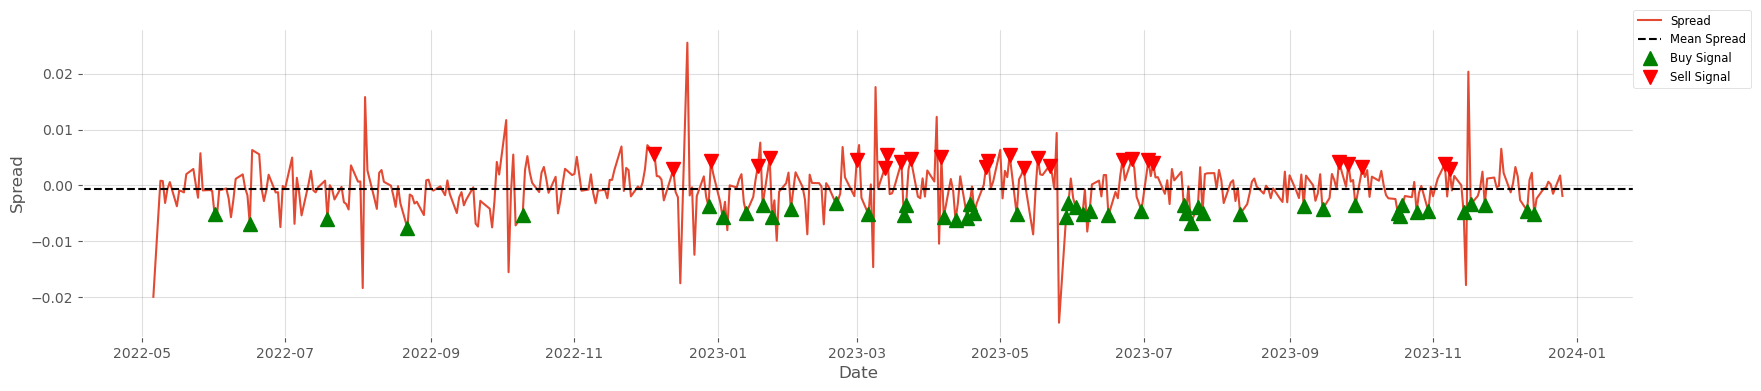

In [152]:
# 绘制图形
plt.figure(figsize=(20, 4))

plt.plot(df2.index, df2['spread'], label='Spread')
plt.axhline(df2['spread'].mean(), color='k', linestyle='--', label='Mean Spread')
# plt.axhline(df2['spread'].std(), color='orange', linestyle='--', label='Upper Bound')
# plt.axhline(- df2['spread'].std(), color='orange', linestyle='--', label='Lower Bound')

# 绘制交易信号
plt.plot(df2.index[df2['signal'] == 1], df2['spread'][df2['signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(df2.index[df2['signal'] == -1], df2['spread'][df2['signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

#plt.title('Spread and Trading Signals')
plt.legend(loc='best', fontsize='small', bbox_to_anchor=(1.08, 1.08))
plt.xlabel('Date')
plt.ylabel('Spread')
plt.savefig('garch2.png', dpi = 300, bbox_inches='tight')

plt.show()

In [98]:
positions4, sharpe_ratio4, max_drawdown4, sortino_ratio4 = calculate_performance_and_sharpe_GARCH(df2)

In [99]:
cumulative_return4 = positions4['Cumulative Return'].iloc[-1] 
print(f"Cumulative Return: {(cumulative_return4)*100:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio4:.2f}")
print(f"Maximum Drawdown: {max_drawdown4:.2f}")
print(f"Sortino Ratio: {sortino_ratio4:.2f}")

Cumulative Return: 37.97
Sharpe Ratio: 0.61
Maximum Drawdown: -8.92
Sortino Ratio: 0.96


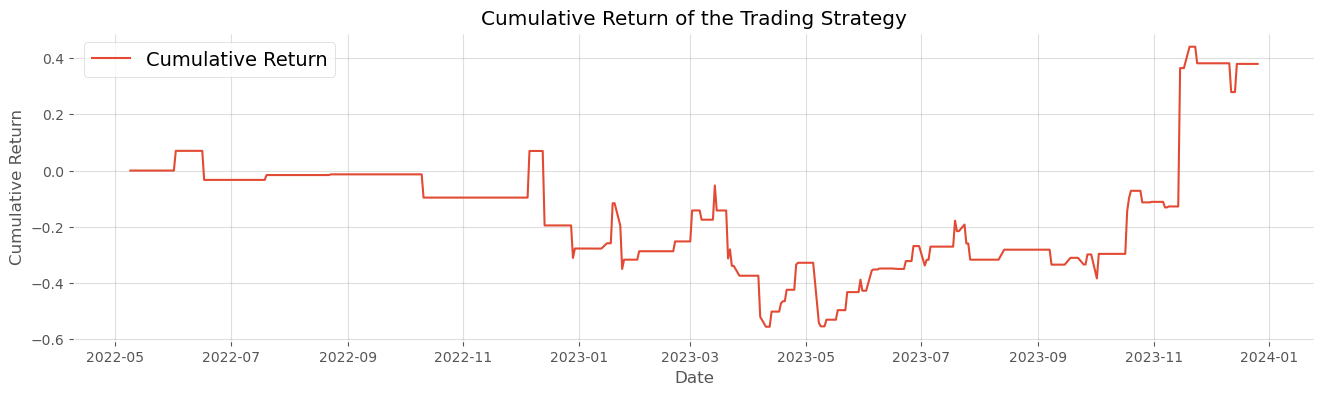

In [100]:
plt.figure(figsize=(16, 4))
plt.plot(positions4.index, positions4['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

## Traditional Pair 3: CAD=X and CHF=X

In [101]:
CAD = "CAD=X"
CHF = "CHF=X"

pair = pairs_data[[CAD, CHF]].copy()
pair = np.log(pair)

ratio = 0.8
train3 = pair[:int(len(pair) * ratio)]
test3 = pair[int(len(pair) * ratio):]

X3 = train3[[CAD]]
Y3 = train3[CHF]

# Add a constant
X3 = sm.add_constant(X3)

# Fit the OLS model
model3 = sm.OLS(Y3, X3).fit()

print("CAD=X and CHF=X model summary")
print(model3.summary())

a3 = model3.params[0]
b3 = model3.params[1]
data3 = train3[CHF] - b3 * train3[CAD] - a3

print(f"a: {a3}, b: {b3}")
print(data3.head())

CAD=X and CHF=X model summary
                            OLS Regression Results                            
Dep. Variable:                  CHF=X   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     1292.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          2.47e-222
Time:                        10:50:17   Log-Likelihood:                 4407.0
No. Observations:                2171   AIC:                            -8810.
Df Residuals:                    2169   BIC:                            -8799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1384 

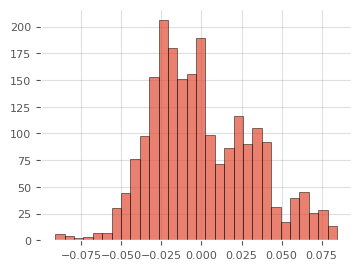

In [102]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera


# Convert the data to a pandas Series
series = pd.Series(data3, name='MSPREAD')

# Calculate descriptive statistics
mean = series.mean()
median = series.median()
maximum = series.max()
minimum = series.min()
std_dev = series.std()
skewness = skew(series)
kurt = kurtosis(series, fisher=True) + 3  # To match pandas' definition of kurtosis
jb_stat, jb_p_value = jarque_bera(series)

# Create the histogram
plt.figure(figsize=(4, 3))
plt.hist(series, bins=30, edgecolor='k', alpha=0.7)
#plt.title('Histogram of MSPREAD')
plt.tick_params(axis='both', which='major', labelsize=8)

# Create text box with statistics
stats_text = f'''\
Series: {series.name}
Sample 1 {len(series)}
Observations {len(series)}

Mean: {mean:.6f}
Median: {median:.6f}
Maximum: {maximum:.6f}
Minimum: {minimum:.6f}
Std. Dev.: {std_dev:.6f}
Skewness: {skewness:.6f}
Kurtosis: {kurt:.6f}
Jarque-Bera: {jb_stat:.6f}
Probability: {jb_p_value:.6f}
'''

# Add the text box to the plot
# plt.gca().text(1.05, 0.5, stats_text, transform=plt.gca().transAxes, fontsize=12,
#                verticalalignment='center', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
#plt.savefig('histogram_mspread3.png', dpi = 300, bbox_inches='tight')

# Show the plot
plt.show()

In [103]:
spread3 = pd.Series(data3, name='MSPREAD')
    
# Generate signals
entry_signals3 = generate_signals(spread3)

# Convert spread to DataFrame if it's not already
if not isinstance(spread3, pd.DataFrame):
    spread3 = spread3.to_frame()

# Add signals as new columns in the spread DataFrame
spread3['Entry Signals'] = entry_signals3

spread3.head()

,MSPREAD,Entry Signals
Date,,
2013-12-31 00:00:00,0.005637,0.0
2014-01-01 00:00:00,-0.001473,0.0
2014-01-02 00:00:00,0.000783,0.0
2014-01-03 00:00:00,-0.006852,0.0
2014-01-06 00:00:00,-0.014792,0.0


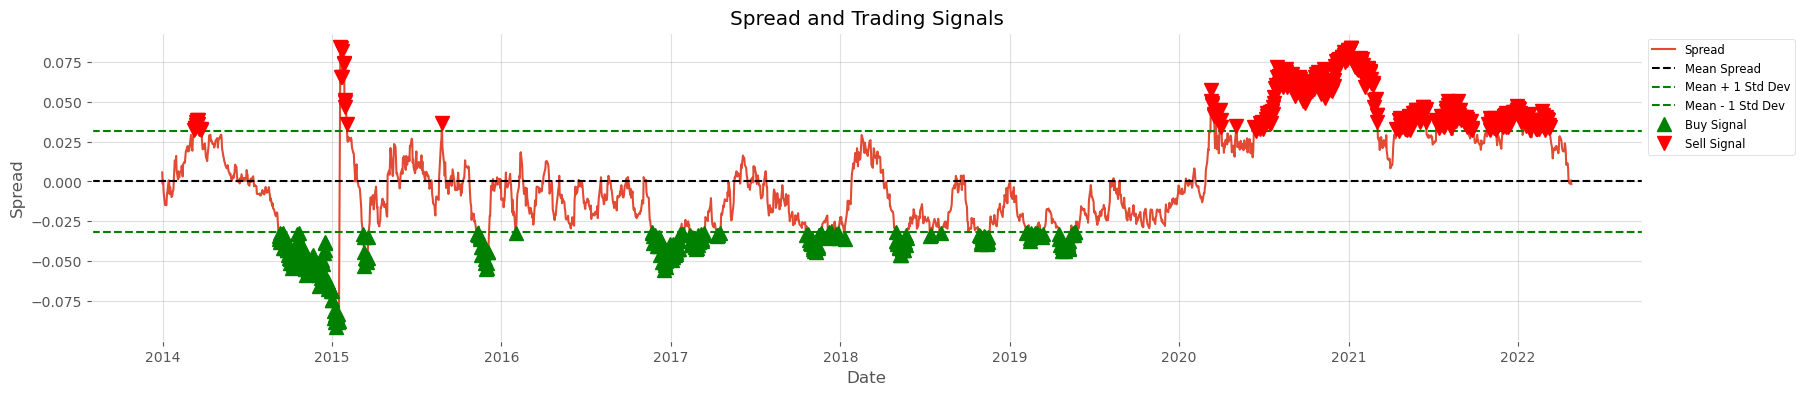

In [104]:
# Plot the spread and signals
plt.figure(figsize=(20, 4))

plt.plot(spread3.index, spread3['MSPREAD'], label='Spread')
plt.axhline(spread3['MSPREAD'].mean(), color='k', linestyle='--', label='Mean Spread')
plt.axhline(spread3['MSPREAD'].mean() + spread3['MSPREAD'].std(), color='g', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(spread3['MSPREAD'].mean() - spread3['MSPREAD'].std(), color='g', linestyle='--', label='Mean - 1 Std Dev')

# Plot signals
plt.plot(spread3.index[spread3['Entry Signals'] == 1], spread3['MSPREAD'][spread3['Entry Signals'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(spread3.index[spread3['Entry Signals'] == -1], spread3['MSPREAD'][spread3['Entry Signals'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Spread and Trading Signals')
plt.legend(loc = 'best', fontsize = 'small', bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Spread')
plt.show()

In [105]:
beta3 = model3.params[1]
positions5, sharpe_ratio5, max_drawdown5, sortino_ratio5 = calculate_performance_and_sharpe_TRAD(spread3)

In [106]:
cumulative_return5 = positions5['Cumulative Return'].iloc[-1] 
print(f"Cumulative Return: {(cumulative_return5):.2f}")
print(f"Sharpe Ratio: {sharpe_ratio5:.2f}")
print(f"Maximum Drawdown: {max_drawdown5:.2f}")
print(f"Sortino Ratio: {sortino_ratio5:.2f}")

Cumulative Return: 0.55
Sharpe Ratio: 0.62
Maximum Drawdown: -318.17
Sortino Ratio: 1.72


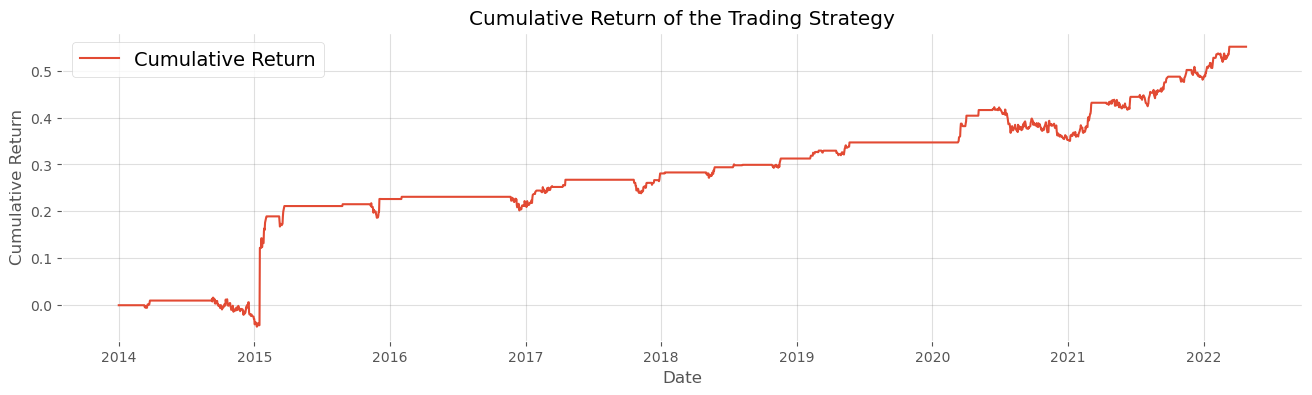

In [107]:
plt.figure(figsize=(16, 4))
plt.plot(positions5.index, positions5['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

### Test

In [108]:
spread_test3 = test3[CHF] - b3 * test3[CAD] - a3

spread_test_series3 = pd.Series(spread_test3, name='MSPREAD')

In [109]:
# Generate signals
entry_signals_test3 = generate_signals(spread_test_series3)

# Convert spread to DataFrame if it's not already
if not isinstance(spread_test_series3, pd.DataFrame):
    spread_test_series3 = spread_test_series3.to_frame()

# Add signals as new columns in the spread DataFrame
spread_test_series3['Entry Signals'] = entry_signals_test3

spread_test_series3.head()

,MSPREAD,Entry Signals
Date,,
2022-04-27 00:00:00,-0.003610,1.0
2022-04-28 00:00:00,-0.010040,1.0
2022-04-29 00:00:00,-0.013449,1.0
2022-05-02 00:00:00,-0.014519,1.0
2022-05-03 00:00:00,-0.017644,1.0


In [110]:
spread_test_series3['Entry Signals'].value_counts()

Entry Signals
 0.0    316
 1.0    140
-1.0     87
Name: count, dtype: int64

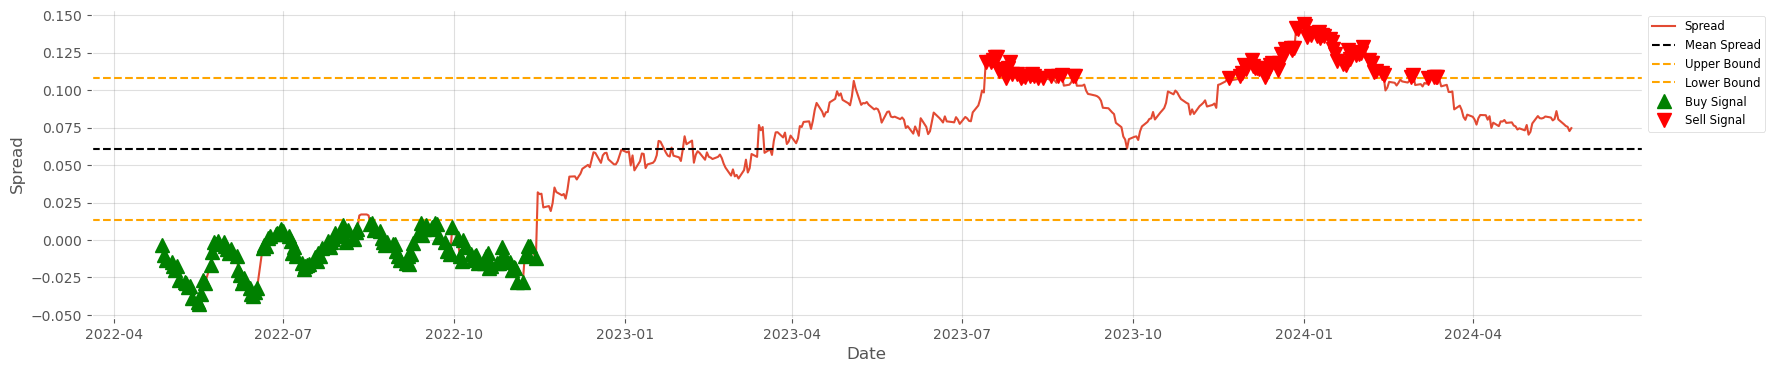

In [111]:
# Plot the spread and signals
plt.figure(figsize=(20, 4))

plt.plot(spread_test_series3.index, spread_test_series3['MSPREAD'], label='Spread')
plt.axhline(spread_test_series3['MSPREAD'].mean(), color='k', linestyle='--', label='Mean Spread')
plt.axhline(spread_test_series3['MSPREAD'].mean() + spread_test_series3['MSPREAD'].std(), color='orange', linestyle='--', label='Upper Bound')
plt.axhline(spread_test_series3['MSPREAD'].mean() - spread_test_series3['MSPREAD'].std(), color='orange', linestyle='--', label='Lower Bound')

# Plot signals
plt.plot(spread_test_series3.index[spread_test_series3['Entry Signals'] == 1], spread_test_series3['MSPREAD'][spread_test_series3['Entry Signals'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(spread_test_series3.index[spread_test_series3['Entry Signals'] == -1], spread_test_series3['MSPREAD'][spread_test_series3['Entry Signals'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

#plt.title('Spread and Trading Signals')
plt.legend(loc = 'best', fontsize = 'small', bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Spread')
#plt.savefig('trading_signal1.png', dpi = 300, bbox_inches='tight')

plt.show()

In [112]:
positions6, sharpe_ratio6, max_drawdown6, sortino_ratio6 = calculate_performance_and_sharpe_TRAD(spread_test_series3)

In [113]:
cumulative_return6 = positions6['Cumulative Return'].iloc[-1] 
print(f"Cumulative Return: {(cumulative_return6)*100:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio6:.2f}")
print(f"Maximum Drawdown: {max_drawdown6:.2f}")
print(f"Sortino Ratio: {sortino_ratio6:.2f}")

Cumulative Return: 7.64
Sharpe Ratio: 0.43
Maximum Drawdown: -4.05
Sortino Ratio: 0.78


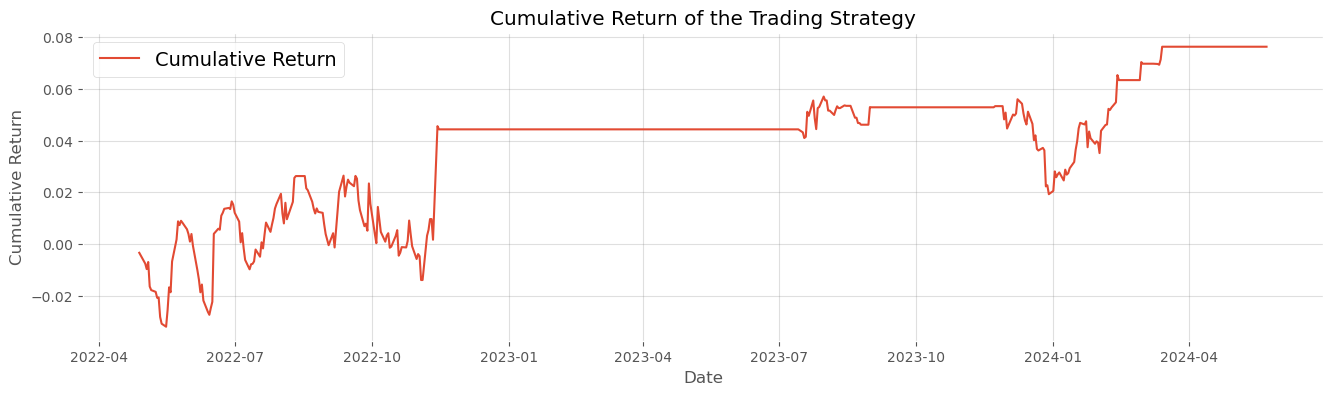

In [114]:
plt.figure(figsize=(16, 4))
plt.plot(positions6.index, positions6['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

## garch Pair 3: CAD=X and CHF=X

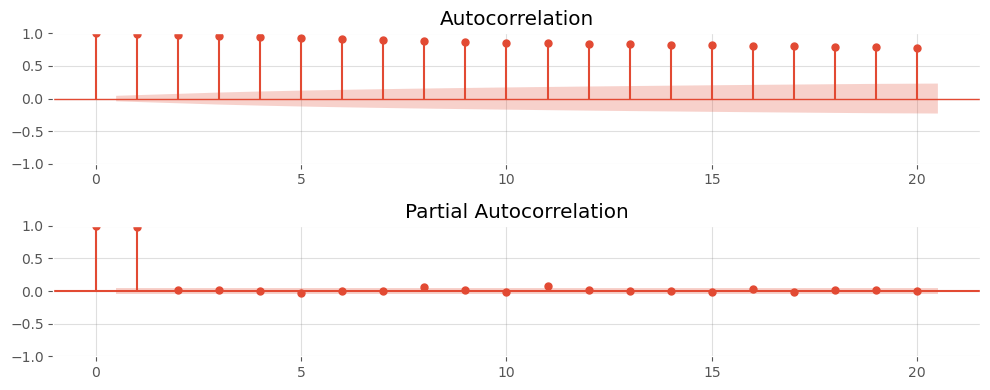

Lag  AC      PAC     Q-Stat  Prob
  1  0.984  0.984  2102.924  0.000
  2  0.968  0.022  4141.012  0.000
  3  0.953  0.018  6118.618  0.000
  4  0.939  -0.001  8037.241  0.000
  5  0.923  -0.037  9893.850  0.000
  6  0.908  0.004  11691.197  0.000
  7  0.894  0.004  13431.849  0.000
  8  0.881  0.067  15125.593  0.000
  9  0.870  0.024  16776.002  0.000
 10  0.858  -0.019  18381.558  0.000
 11  0.848  0.080  19952.929  0.000
 12  0.840  0.020  21493.290  0.000
 13  0.831  0.007  23003.599  0.000
 14  0.823  0.008  24484.846  0.000
 15  0.814  -0.019  25935.494  0.000
 16  0.807  0.033  27359.576  0.000
 17  0.799  -0.013  28756.144  0.000
 18  0.791  0.010  30125.592  0.000
 19  0.783  0.022  31469.921  0.000
 20  0.776  -0.003  32789.584  0.000


In [115]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, q_stat

# Convert the data to a pandas Series
series3 = pd.Series(data3, name='MSPREAD')

# Calculate autocorrelation and partial autocorrelation
acf_values = acf(series3, nlags=20)
pacf_values = pacf(series3, nlags=20)
q_stat_values, p_values = q_stat(acf_values[1:], len(series3))

# Plot the autocorrelation and partial autocorrelation
fig, ax = plt.subplots(2, 1, figsize=(10, 4))

acf_plot = plot_acf(series3, lags=20, ax=ax[0], alpha=0.05, linewidth = 1)
ax[0].set_title('Autocorrelation')
for patch in ax[0].patches:
    patch.set_facecolor('blue')
    patch.set_alpha(0.3)
    
# Plot PACF
pacf_plot = plot_pacf(series3, lags=20, ax=ax[1], alpha=0.05)
ax[1].set_title('Partial Autocorrelation')

plt.tight_layout()
plt.show()

# Display the statistics
print("Lag  AC      PAC     Q-Stat  Prob")
for i in range(1, 21):
    print(f"{i:>3}  {acf_values[i]:.3f}  {pacf_values[i]:.3f}  {q_stat_values[i-1]:.3f}  {p_values[i-1]:.3f}")

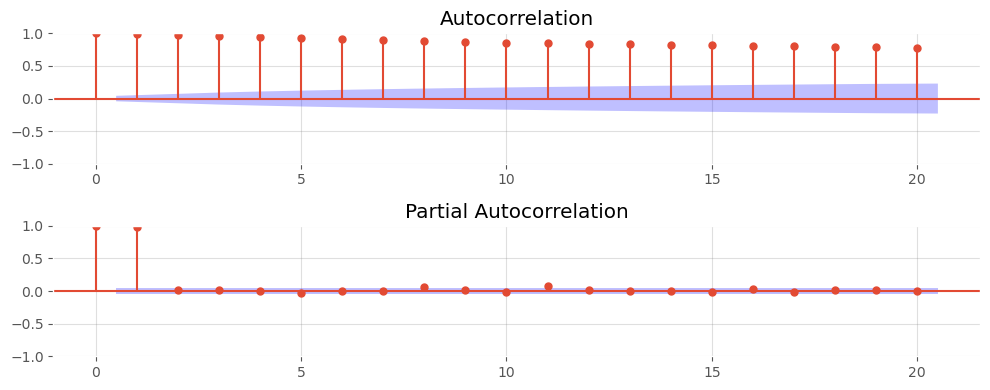

Lag  AC      PAC     Q-Stat  Prob
  1  0.984  0.984  2102.924  0.000
  2  0.968  0.022  4141.012  0.000
  3  0.953  0.018  6118.618  0.000
  4  0.939  -0.001  8037.241  0.000
  5  0.923  -0.037  9893.850  0.000
  6  0.908  0.004  11691.197  0.000
  7  0.894  0.004  13431.849  0.000
  8  0.881  0.067  15125.593  0.000
  9  0.870  0.024  16776.002  0.000
 10  0.858  -0.019  18381.558  0.000
 11  0.848  0.080  19952.929  0.000
 12  0.840  0.020  21493.290  0.000
 13  0.831  0.007  23003.599  0.000
 14  0.823  0.008  24484.846  0.000
 15  0.814  -0.019  25935.494  0.000
 16  0.807  0.033  27359.576  0.000
 17  0.799  -0.013  28756.144  0.000
 18  0.791  0.010  30125.592  0.000
 19  0.783  0.022  31469.921  0.000
 20  0.776  -0.003  32789.584  0.000


In [116]:
# Let's try the provided color customization in your original code
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, q_stat
from matplotlib.collections import PolyCollection, LineCollection

def plot_acf_colors(ax, facecolor):
    """Utility function to get some control over colors with plot_acf()"""
    for item in ax.collections:
        # Change the color of the confidence interval 
        if isinstance(item, PolyCollection):
            item.set_facecolor(facecolor)
    return ax

# Convert the data to a pandas Series
series3 = pd.Series(data3, name='MSPREAD')

# Calculate autocorrelation and partial autocorrelation
acf_values = acf(series3, nlags=20)
pacf_values = pacf(series3, nlags=20)
q_stat_values, p_values = q_stat(acf_values[1:], len(series3))

# Plot the autocorrelation and partial autocorrelation with customized colors
fig, ax = plt.subplots(2, 1, figsize=(10, 4))

# Plot ACF
plot_acf(series3, lags=20, ax=ax[0], alpha=0.05)
ax[0] = plot_acf_colors(ax[0], facecolor="blue")
ax[0].set_title('Autocorrelation')

# Plot PACF
plot_pacf(series3, lags=20, ax=ax[1], alpha=0.05)
ax[1] = plot_acf_colors(ax[1], facecolor="blue")
ax[1].set_title('Partial Autocorrelation')

plt.tight_layout()

#plt.savefig('pacf.png', dpi = 300, bbox_inches='tight')

plt.show()

# Display the statistics
print("Lag  AC      PAC     Q-Stat  Prob")
for i in range(1, 21):
    print(f"{i:>3}  {acf_values[i]:.3f}  {pacf_values[i]:.3f}  {q_stat_values[i-1]:.3f}  {p_values[i-1]:.3f}")


In [117]:
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

optimal_lag_aic, optimal_lag_bic = select_ar_lag(data3)
print(f"Optimal AR lag by AIC: {optimal_lag_aic}")
print(f"Optimal AR lag by BIC: {optimal_lag_bic}")

Optimal AR lag by AIC: 1
Optimal AR lag by BIC: 1


In [118]:
model_ar3 = AutoReg(data3, lags=1).fit()

print(model_ar3.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 2171
Model:                     AutoReg(1)   Log Likelihood                8116.264
Method:               Conditional MLE   S.D. of innovations              0.006
Date:                Fri, 14 Jun 2024   AIC                         -16226.527
Time:                        10:50:19   BIC                         -16209.480
Sample:                    01-01-2014   HQIC                        -16220.294
                         - 04-26-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.348e-06      0.000     -0.027      0.978      -0.000       0.000
y.L1           0.9835      0.004    253.443      0.000       0.976       0.991
                                    Roots           

In [119]:
garch_model3 = arch_model(model_ar3.resid, vol='Garch', p=2, q=2).fit(disp='off')
forecast3 = garch_model3.forecast(horizon=1)

print(garch_model3.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4271.36
Distribution:                  Normal   AIC:                           8554.72
Method:            Maximum Likelihood   BIC:                           8588.82
                                        No. Observations:                 2170
Date:                Fri, Jun 14 2024   Df Residuals:                     2169
Time:                        10:50:19   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4119      1.747      0.236      0.814 [ -3.012,  3.83

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [120]:
std_resid = garch_model3.std_resid
lm_test = het_arch(std_resid)
print(f"Lagrange Multiplier Test Statistic: {lm_test[0]}")
print(f"p-value: {lm_test[1]}")

Lagrange Multiplier Test Statistic: 1942.6110982071837
p-value: 0.0


In [121]:
results3 = rolling_forecast(data3, garch_p=2, garch_q=2)

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/si

In [122]:
min_length = min(len(results3), len(pair[int(len(pair) * 0.8):]))
results3 = results3[:min_length]
index_slice = pair[int(len(pair) * 0.8):int(len(pair) * 0.8) + min_length].index

In [123]:
# Align the index and make sure the lengths match
df = pd.DataFrame(results3, index=index_slice)
test = pair[int(len(pair) * 0.8):]
test = test3[CHF] - b3 * test3[CAD] - a3
df = pd.concat([test[:len(df)], df], axis=1)
df = df.rename(columns={df.columns[0]: "spread"})
df["spread"] = (df["spread"] -
                df["c"] -
                df["l1"] * df["spread"].shift(1) -
                df["l2"] * df["spread"].shift(2) -
                df["l3"] * df["spread"].shift(3) -
                df["l4"] * df["spread"].shift(4) -
                df["l5"] * df["spread"].shift(5) -
                df["l6"] * df["spread"].shift(6) -
                df["l7"] * df["spread"].shift(7))
df3 = df.dropna()

df3["signal"] = df3.apply(assign_values, axis=1)
df3['price'] = 1/b3 * test3[CAD] - test3[CHF]

df3

,spread,c,l1,l2,l3,l4,l5,l6,l7,sigma,signal,price
Date,,,,,,,,,,,,
2022-05-06,-0.009710,-0.000252,0.956634,0.015539,0,0,0,0,0,0.004768,0,-0.654595
2022-05-09,-0.002064,-0.000249,0.955943,0.016626,0,0,0,0,0,0.004500,0,-0.668615
2022-05-10,-0.001237,-0.000255,0.955299,0.017013,0,0,0,0,0,0.004820,0,-0.683092
2022-05-11,-0.002888,-0.000255,0.955404,0.016873,0,0,0,0,0,0.004665,0,-0.684574
2022-05-12,-0.000500,-0.000245,0.955199,0.017406,0,0,0,0,0,0.004634,0,-0.678554
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,0.007381,-0.000001,0.917635,0.073767,0,0,0,0,0,0.003763,-1,-0.889797
2023-12-21,-0.000354,0.000002,0.923102,0.068499,0,0,0,0,0,0.003943,0,-0.891910
2023-12-22,0.005921,0.000003,0.921420,0.070245,0,0,0,0,0,0.003967,-1,-0.884782


In [124]:
df3["signal"].value_counts()

signal
 0    338
-1     55
 1     35
Name: count, dtype: int64

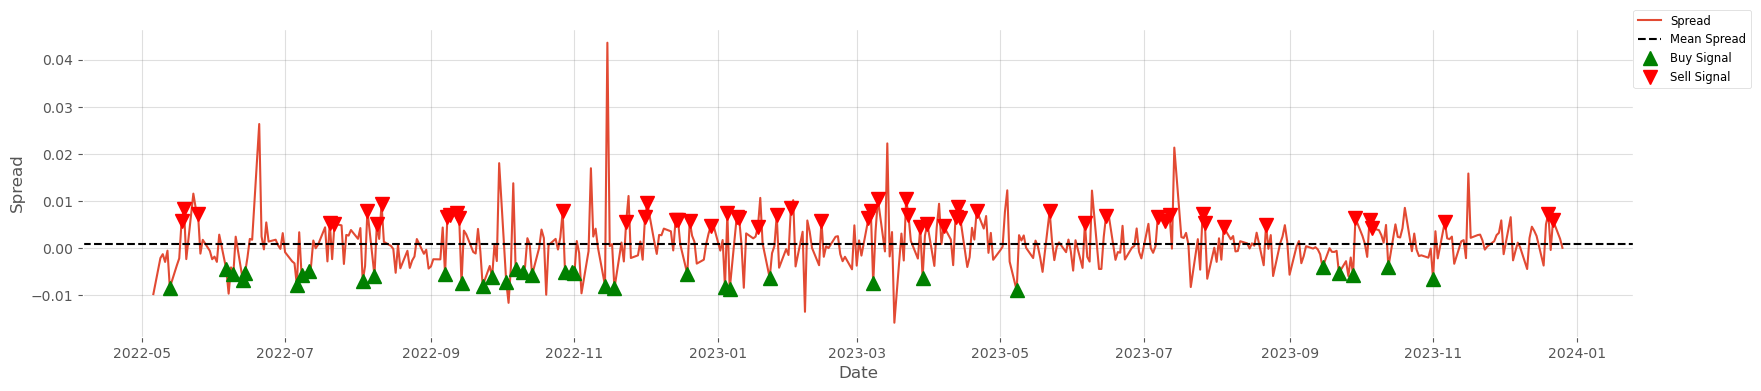

In [170]:
# 绘制图形
plt.figure(figsize=(20, 4))

plt.plot(df3.index, df3['spread'], label='Spread')
plt.axhline(df3['spread'].mean(), color='k', linestyle='--', label='Mean Spread')
# plt.axhline(df3['spread'].std(), color='orange', linestyle='--', label='Upper Bound')
# plt.axhline(- df3['spread'].std(), color='orange', linestyle='--', label='Lower Bound')

# 绘制交易信号
plt.plot(df3.index[df3['signal'] == 1], df3['spread'][df3['signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(df3.index[df3['signal'] == -1], df3['spread'][df3['signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

#plt.title('Spread and Trading Signals')
plt.legend(loc='best', fontsize='small', bbox_to_anchor=(1.08, 1.08))
plt.xlabel('Date')
plt.ylabel('Spread')

plt.savefig('garch3.png', dpi = 300, bbox_inches='tight')

plt.show()

In [126]:
positions7, sharpe_ratio7, max_drawdown7, sortino_ratio7 = calculate_performance_and_sharpe_GARCH(df3)

In [127]:
cumulative_return7 = positions7['Cumulative Return'].iloc[-1] 
print(f"Cumulative Return: {(cumulative_return7) * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio7:.2f}")
print(f"Maximum Drawdown: {max_drawdown7:.2f}")
print(f"Sortino Ratio: {sortino_ratio7:.2f}")

Cumulative Return: 13.29%
Sharpe Ratio: 0.57
Maximum Drawdown: -inf
Sortino Ratio: 0.97


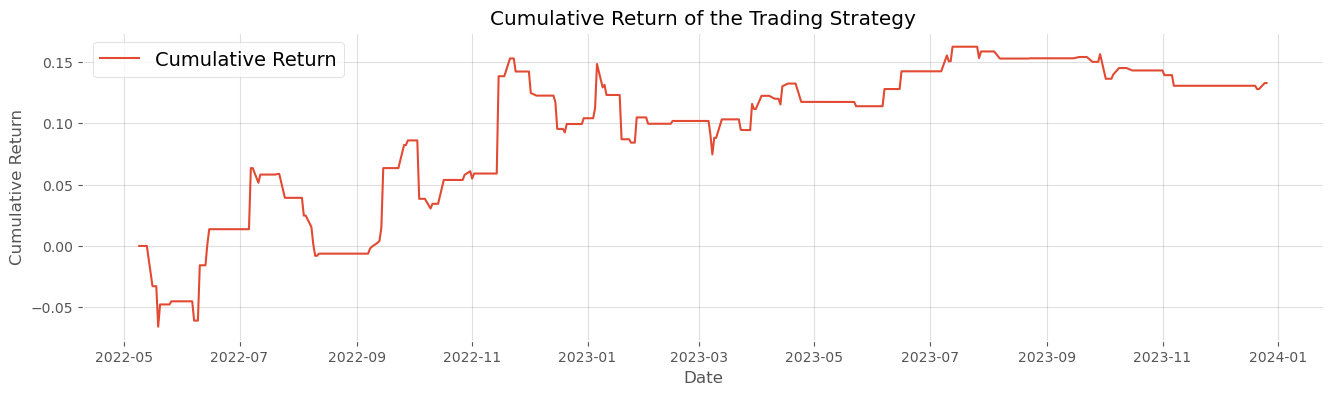

In [128]:
plt.figure(figsize=(16, 4))
plt.plot(positions7.index, positions7['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

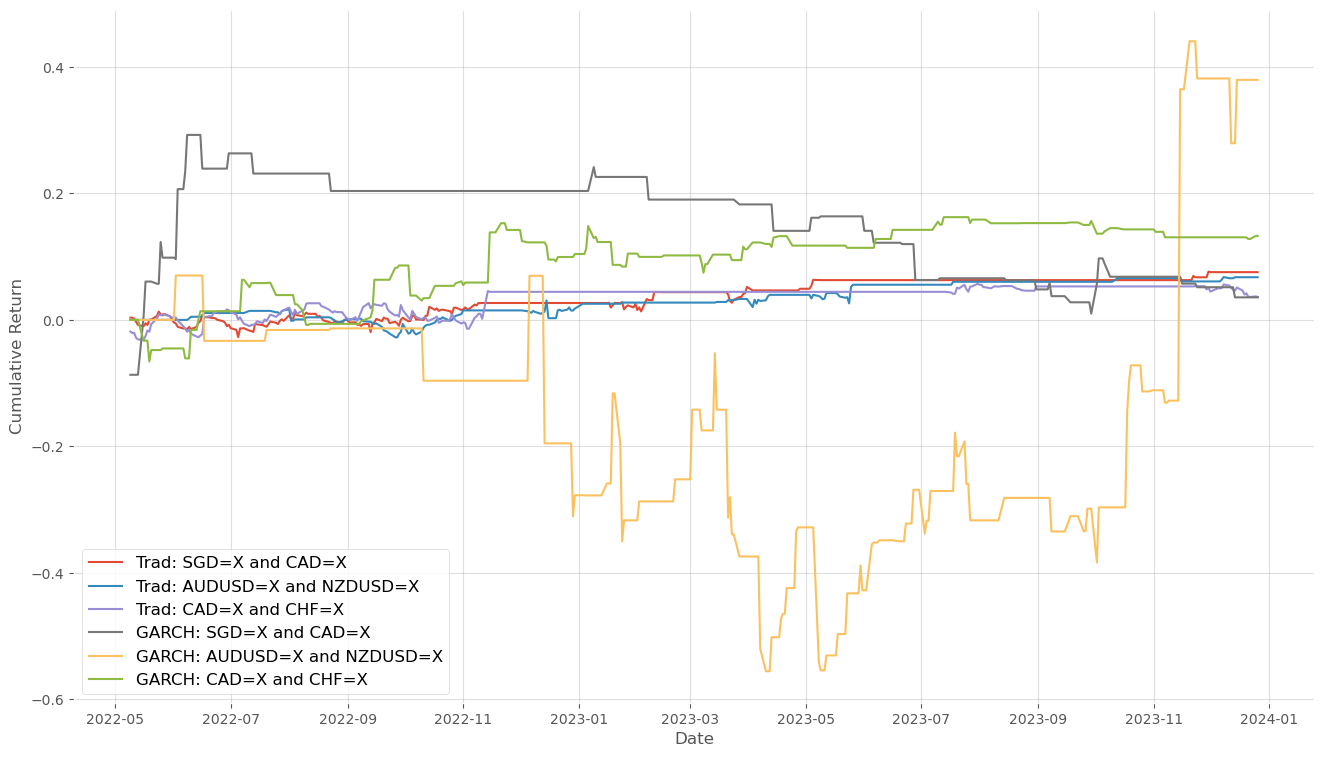

In [129]:
# Find the common date range
common_start_date = max(positions1_test.index.min(), positions8.index.min(), positions6.index.min(),
                        positions2.index.min(), positions4.index.min(), positions7.index.min())
common_end_date = min(positions1_test.index.max(), positions8.index.max(), positions6.index.max(),
                      positions2.index.max(), positions4.index.max(), positions7.index.max())

# Trim each dataset to the common date range
positions1_test_trimmed = positions1_test[(positions1_test.index >= common_start_date) & (positions1_test.index <= common_end_date)]
positions8_trimmed = positions8[(positions8.index >= common_start_date) & (positions8.index <= common_end_date)]
positions6_trimmed = positions6[(positions6.index >= common_start_date) & (positions6.index <= common_end_date)]
positions2_trimmed = positions2[(positions2.index >= common_start_date) & (positions2.index <= common_end_date)]
positions4_trimmed = positions4[(positions4.index >= common_start_date) & (positions4.index <= common_end_date)]
positions7_trimmed = positions7[(positions7.index >= common_start_date) & (positions7.index <= common_end_date)]

# Plot the trimmed datasets
plt.figure(figsize=(16, 9))
plt.plot(positions1_test_trimmed['Cumulative Return'], label='Trad: SGD=X and CAD=X')
plt.plot(positions8_trimmed['Cumulative Return'], label='Trad: AUDUSD=X and NZDUSD=X')
plt.plot(positions6_trimmed['Cumulative Return'], label='Trad: CAD=X and CHF=X')
plt.plot(positions2_trimmed['Cumulative Return'], label='GARCH: SGD=X and CAD=X')
plt.plot(positions4_trimmed['Cumulative Return'], label='GARCH: AUDUSD=X and NZDUSD=X')
plt.plot(positions7_trimmed['Cumulative Return'], label='GARCH: CAD=X and CHF=X')

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(loc='best', fontsize=12)

#plt.savefig('cum.png', dpi = 300, bbox_inches='tight')

plt.show()